In [927]:
import os
import json
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



In [929]:
def read_json(folder_path):
    temp = []
    for root, dirs, files in os.walk(folder_path):
        for file in sorted(files):
            if file.endswith(".json"):
                full_path = os.path.join(root, file)
                with open(full_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    temp.append(data)
    return temp


def Find_DiseaseAndType(filepath):
    dict = defaultdict(lambda: defaultdict(list))
    for root, dirs, files in os.walk(filepath):
        files = [f for f in files if f.endswith('json')]
        if files:
            disease_name = os.path.basename(os.path.dirname(root))
            type_name = os.path.basename(root)
            dict[disease_name][type_name].append(len(files))
    return dict

In [931]:
ans = []
ques = []
ques = read_json("EDA/질문")
ans = read_json("EDA/답변")

ques_disease = defaultdict(list)
ans_disease = defaultdict(list)

# disease 명 별로 dict 생성
for q in ques:
    d = q.get("disease_name", {}).get("kor")
    ques_disease[d].append(q)

for a in ans:
    d = a.get("disease_name", {}).get("kor")
    ans_disease[d].append(a)

In [923]:
merged_data = []

for disease in ques_disease:
    q_list = ques_disease[disease]
    a_list = ans_disease.get(disease, [])
    # zip 사용, 더 갯수가 적은 쪽 기준으로 병합이 이루어짐 → 일부 질문/답변이 손실될 수 있다는 문제 있음
    # zip_longest 를 이용할지 고민 필요
    for q, a in zip(q_list, a_list):
        merged_data.append({
            "question_id": q.get("fileName"),
            "answer_id": a.get("fileName"),
            "disease": disease,
            "disease_department": a.get("department"),
            "disease_category": q.get("disease_category"),
            "intention": q.get("intention"),
            "question_text": q.get("question"),
            "answer_intro": a.get("answer", {}).get("intro"),
            "answer_body": a.get("answer", {}).get("body"),
            "answer_conclusion": a.get("answer", {}).get("conclusion")
        })

In [933]:
df = pd.DataFrame(merged_data)
df['disease_department']

0         [피부과]
1         [피부과]
2         [피부과]
3         [피부과]
4         [피부과]
          ...  
104651     [내과]
104652     [내과]
104653     [내과]
104654     [내과]
104655     [내과]
Name: disease_department, Length: 104656, dtype: object

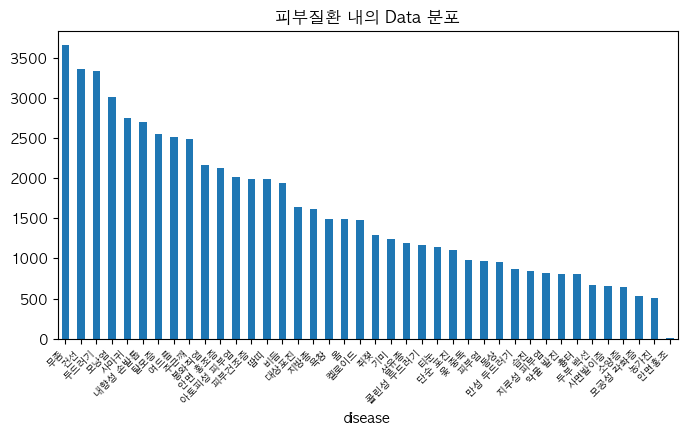

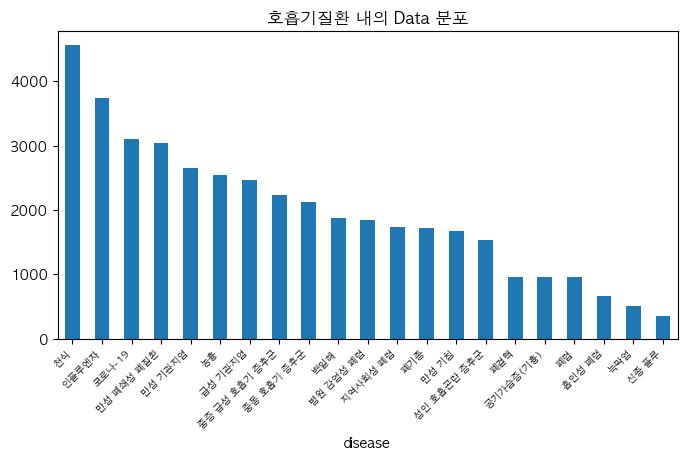

In [935]:
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())

for category in df['disease_category'].dropna().unique():
    subset = df[df['disease_category']==category]
    plt.figure(figsize=(8,4))
    subset['disease'].value_counts().plot(kind='bar')
    plt.title(f"{category} 내의 Data 분포")
    plt.xticks(rotation=45,ha='right',fontsize=7)
    plt.show()

In [937]:
import unicodedata
# 내부 인코딩 형태가 달라서 정규화 필요함

dict = defaultdict(lambda: defaultdict(list))
for root, dirs, files in os.walk('EDA'):
        files = [f for f in files if f.endswith('json')]        
        if files:
            disease_name = unicodedata.normalize('NFC',os.path.basename(os.path.dirname(root)))
            type_name = unicodedata.normalize('NFC',os.path.basename(root))
            dict[disease_name][type_name].append(len(files))
dict.keys()

dict_keys(['비듬', '약물 발진', '여드름', '농가진', '사면발이증', '옻 중독', '모공성 각화증', '콜린성 두드러기', '내향성 손발톱', '사마귀', '섬유종', '두부 백선', '건선', '아토피성 피부염', '안면 홍조증', '옴', '기미', '안면홍조', '탈모증', '땀띠', '피부건조증', '티눈', '대상포진', '두드러기', '소양증', '주근깨', '피부염', '켈로이드', '동상', '봉와직염', '지방종', '단순 포진', '만성 두드러기', '쥐젖', '욕창', '흉터', '무좀', '지루성 피부염', '습진', '모낭염', '만성 기관지염', '지역사회성 폐렴', '폐렴', '공기가슴증(기흉)', '농흉', '늑막염', '백일해', '급성 기관지염', '성인 호흡곤란 증후군', '중동 호흡기 증후군', '폐기종', '만성 기침', '인플루엔자', '폐결핵', '신종 플루', '천식', '만성 폐쇄성 폐질환', '중증 급성 호흡기 증후군', '흡인성 폐렴', '병원 감염성 폐렴', '코로나-19', '기저귀 피부염', '오타 모반', '무모증', '선천성 색소결핍증', '수부 습진', '모반', '표피낭종', '광선 각화증', '돌발성 발진', '백반증', '간찰성 홍반', '스티븐 존슨 증후군', '피부근육염', '국소 다한증', '동전모양 습진', '다모증', '대상포진 후 신경통', '화염상 모반', '피부섬유육종', '탈락 피부염', '베체트 병', '탄저병', '피부 농양', '한포진', '태열', '비립종', '슈도모나스 감염', '단독', '한랭 두드러기', '어린선', '어루러기', '한센병', '편평 태선', '만성 단순 태선', '접촉성 피부염', '규폐증', '기관지확장증', '폐색전증', '기관 협착', '낭종성 폐질환', '객혈'])

In [939]:
for i in dict:
    print(f"질병 : {i}")
    for j in dict[i]:
        print(f"{j} 카테고리 : 질문 {dict[i][j][0]}, 답변 {dict[i][j][1]}")
    print()

질병 : 비듬
약물 카테고리 : 질문 337, 답변 2086
진단 카테고리 : 질문 236, 답변 160
치료 카테고리 : 질문 277, 답변 160
식이, 생활 카테고리 : 질문 361, 답변 126
증상 카테고리 : 질문 322, 답변 160
원인 카테고리 : 질문 207, 답변 160
정의 카테고리 : 질문 193, 답변 160

질병 : 약물 발진
진단 카테고리 : 질문 264, 답변 160
치료 카테고리 : 질문 295, 답변 160
증상 카테고리 : 질문 312, 답변 160
원인 카테고리 : 질문 185, 답변 160
정의 카테고리 : 질문 161, 답변 160

질병 : 여드름
검진 카테고리 : 질문 259, 답변 73
약물 카테고리 : 질문 248, 답변 160
예방 카테고리 : 질문 428, 답변 1349
진단 카테고리 : 질문 264, 답변 160
치료 카테고리 : 질문 575, 답변 160
재활 카테고리 : 질문 200, 답변 38
운동 카테고리 : 질문 292, 답변 33
식이, 생활 카테고리 : 질문 391, 답변 62
증상 카테고리 : 질문 224, 답변 160
원인 카테고리 : 질문 415, 답변 160
정의 카테고리 : 질문 200, 답변 160

질병 : 농가진
진단 카테고리 : 질문 313, 답변 16
치료 카테고리 : 질문 352, 답변 160
증상 카테고리 : 질문 194, 답변 160
원인 카테고리 : 질문 208, 답변 16
정의 카테고리 : 질문 347, 답변 160

질병 : 사면발이증
진단 카테고리 : 질문 190, 답변 160
치료 카테고리 : 질문 216, 답변 160
증상 카테고리 : 질문 202, 답변 160
원인 카테고리 : 질문 172, 답변 16
정의 카테고리 : 질문 283, 답변 160

질병 : 옻 중독
약물 카테고리 : 질문 328, 답변 16
예방 카테고리 : 질문 179, 답변 160
진단 카테고리 : 질문 310, 답변 160
치료 카테고리 : 질문 308, 답변 160
증상 카테고리 : 

IndexError: list index out of range

In [941]:
records = []

for disease in dict:
    for category in dict[disease]:
        # 질문, 답변 둘중 하나라도 empty 인 경우는 continue
        if len(dict[disease][category]) < 2:
            #print(disease, category)
            continue
        question_count = dict[disease][category][0]
        answer_count = dict[disease][category][1]
        records.append({
            '질병': disease,
            '카테고리': category,
            '질문 수': question_count,
            '답변 수': answer_count
        })

df_count = pd.DataFrame(records)
df_count

,질병,카테고리,질문 수,답변 수
0,비듬,약물,337,2086
1,비듬,진단,236,160
2,비듬,치료,277,160
3,비듬,"식이, 생활",361,126
4,비듬,증상,322,160
...,...,...,...,...
423,코로나-19,진단,478,896
424,코로나-19,치료,497,600
425,코로나-19,증상,329,1318
426,코로나-19,원인,382,452


In [943]:
print(f"질문 수 : {df_count['질문 수'].sum()}")
print(f"답변 수: {df_count['답변 수'].sum()}")

질문 수 : 127628
답변 수: 251506


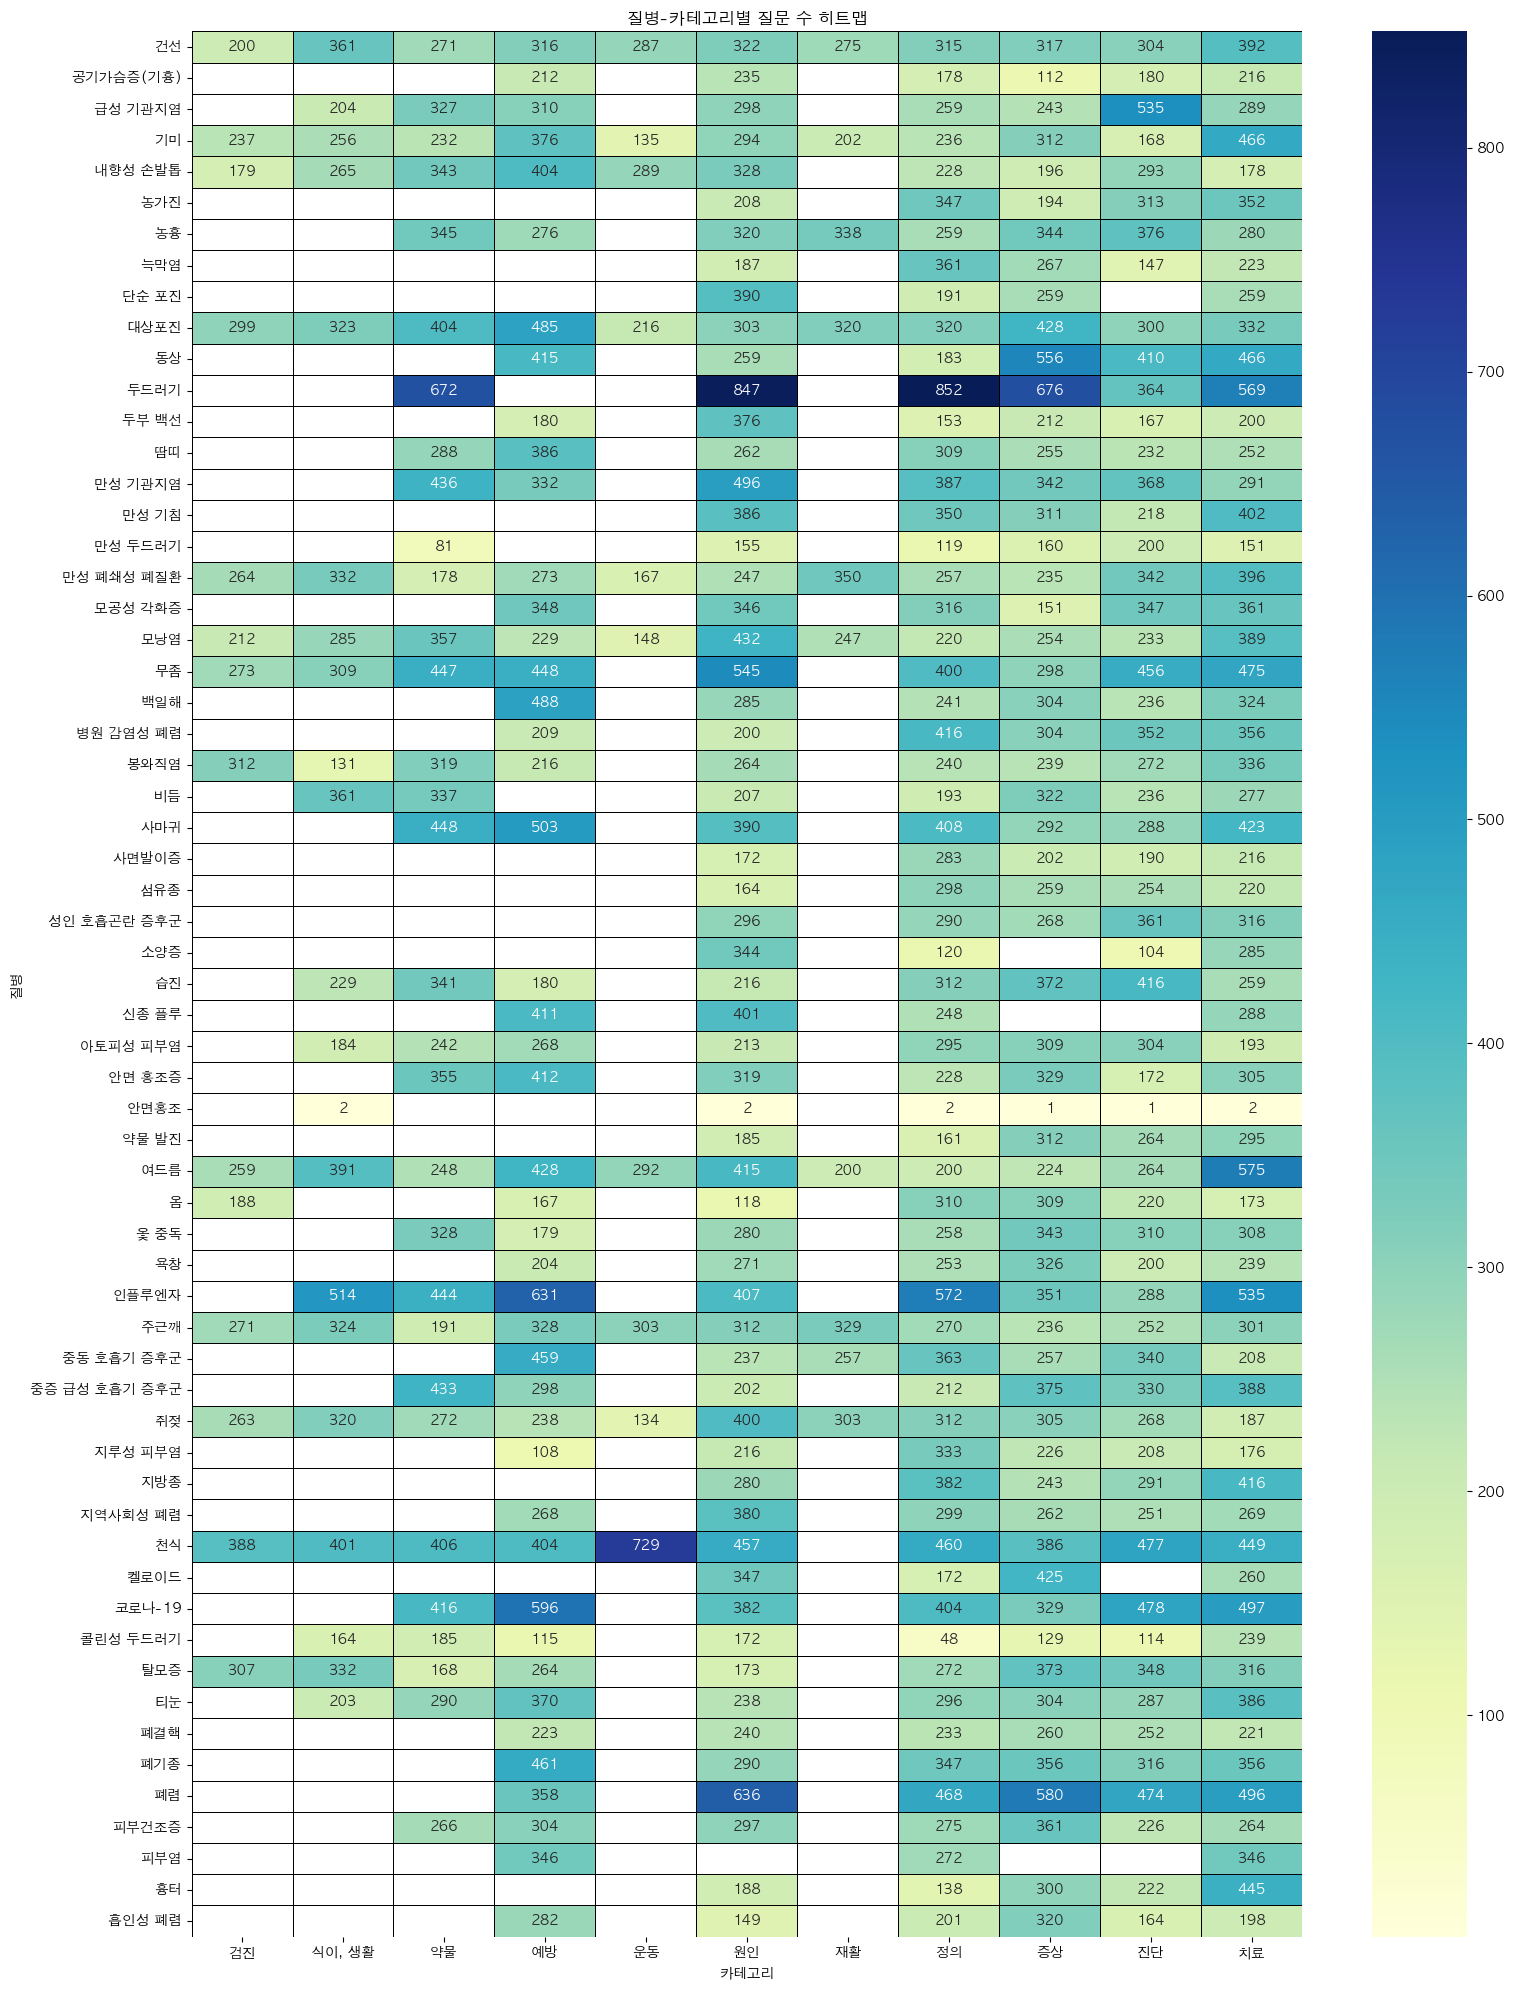

In [945]:
import seaborn as sns
pivot_df = df_count.pivot_table(index='질병', columns='카테고리', values='질문 수')

plt.figure(figsize=(16,20))
sns.heatmap(pivot_df, annot=True, fmt='.0f', cmap='YlGnBu', linewidth=0.5, linecolor='black')
plt.title("질병-카테고리별 질문 수 히트맵")
plt.ylabel("질병")
plt.xlabel("카테고리")
plt.tight_layout()
plt.show()

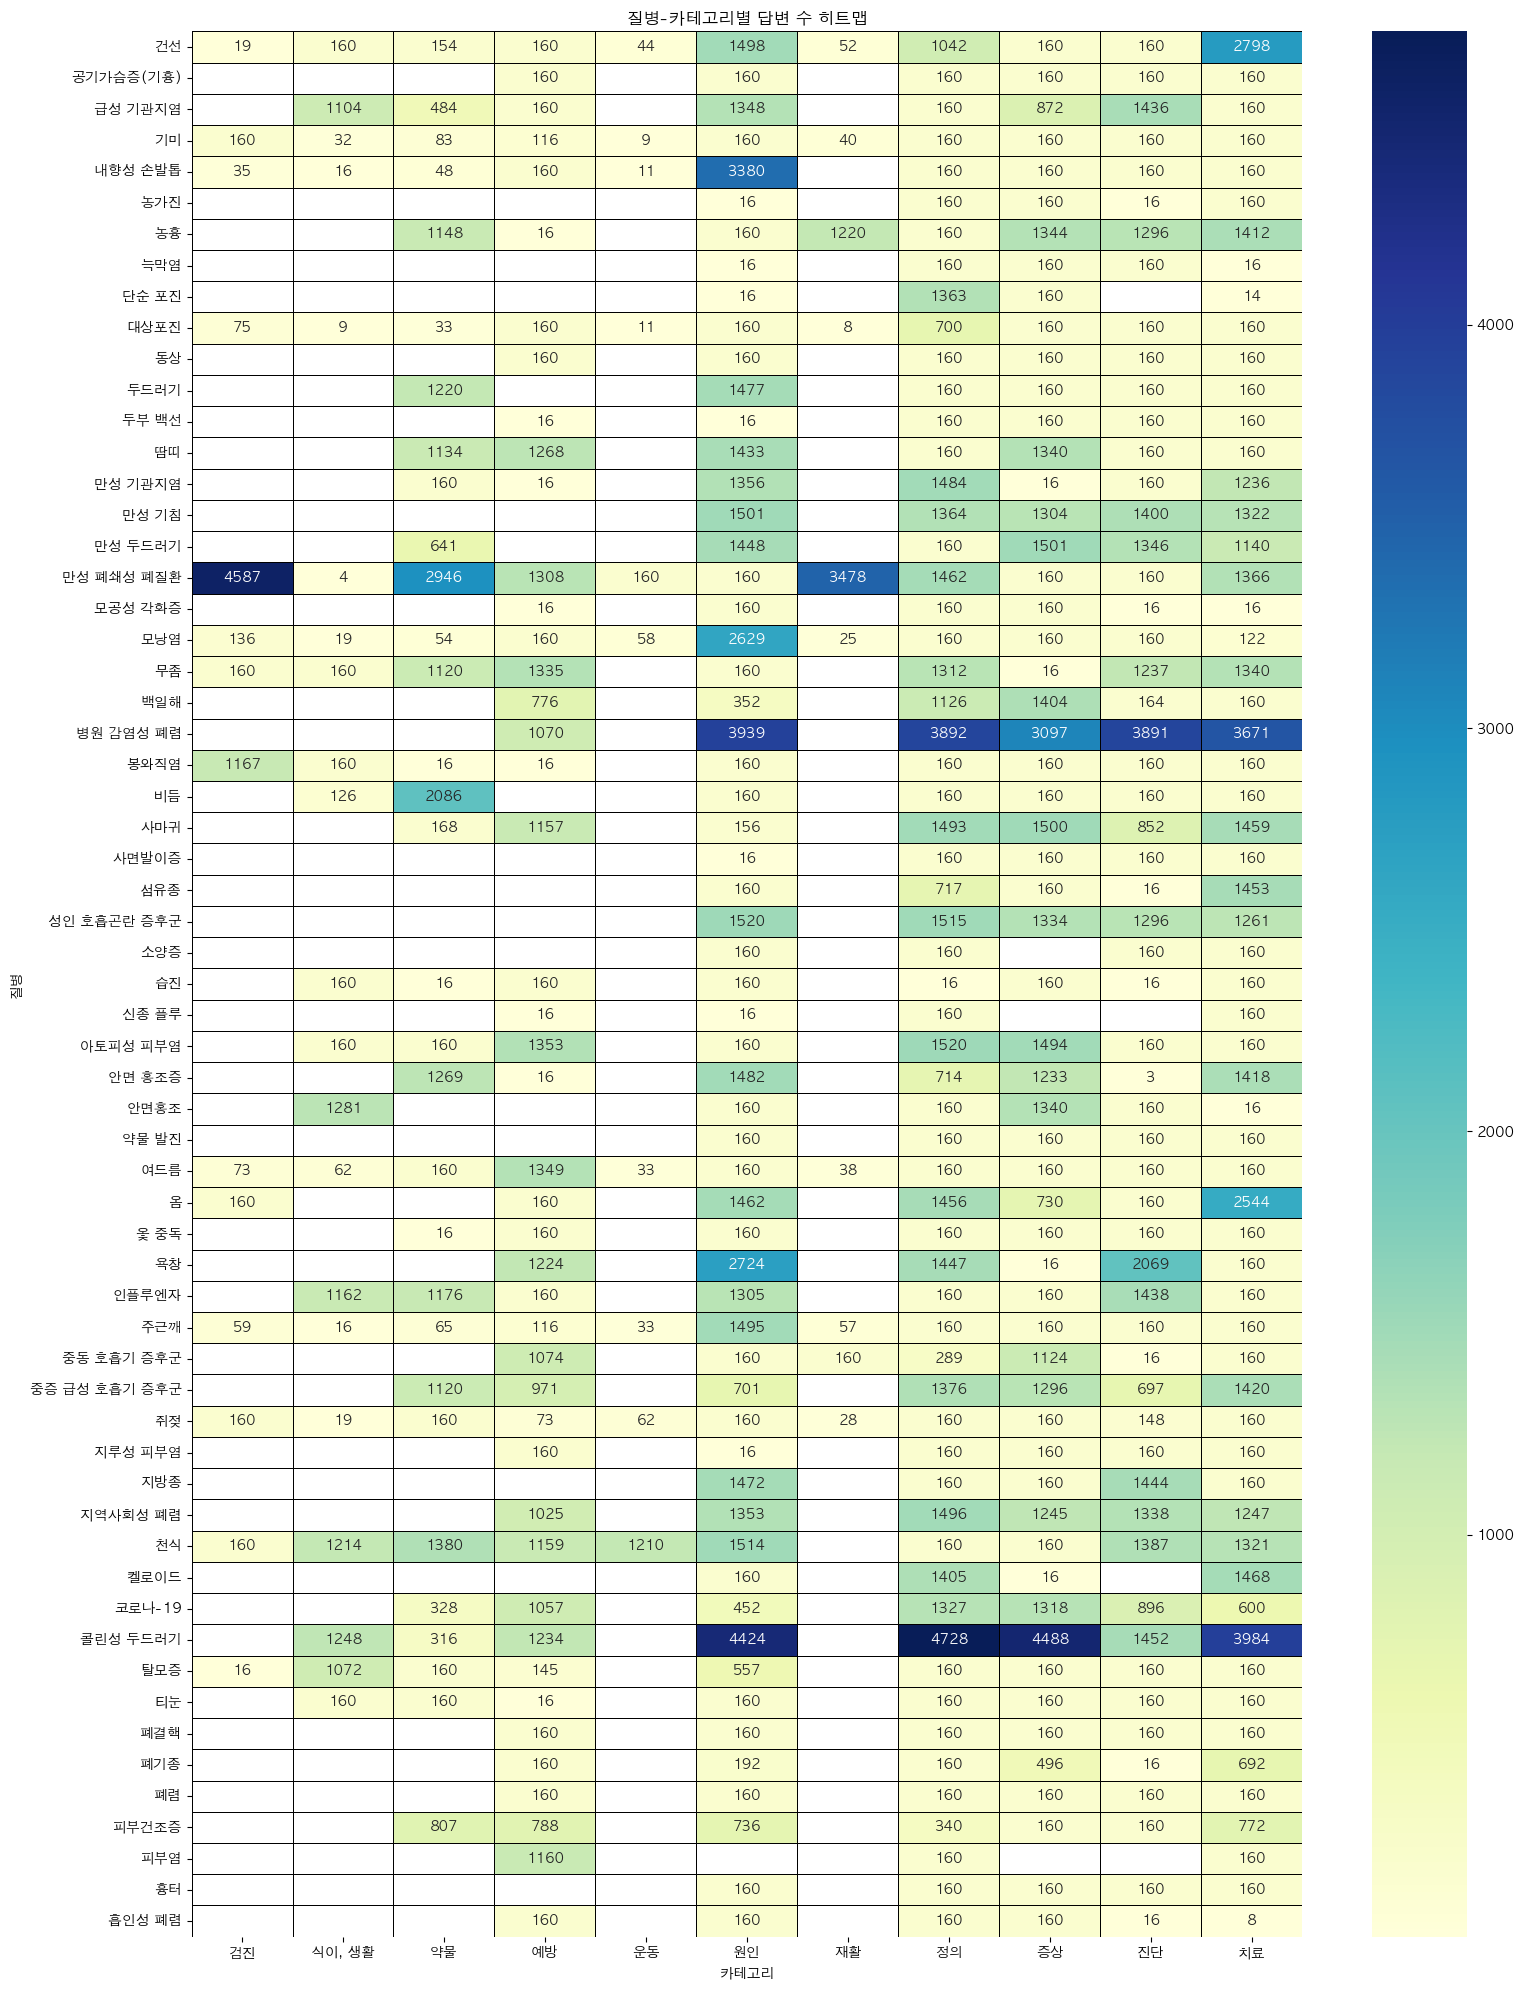

In [947]:
import seaborn as sns
pivot_df = df_count.pivot_table(index='질병', columns='카테고리', values='답변 수')

plt.figure(figsize=(16,20))
sns.heatmap(pivot_df, annot=True, fmt='.0f', cmap='YlGnBu', linewidth=0.5, linecolor='black')
plt.title("질병-카테고리별 답변 수 히트맵")
plt.ylabel("질병")
plt.xlabel("카테고리")
plt.tight_layout()
plt.show()

In [949]:
df['answer_full'] = df['answer_intro']+df['answer_body']+df['answer_conclusion']
# answer_conclusion 부분만 사용할지, intro body conclusion 을 합쳐서 사용할지도 고민 필요
df

,question_id,answer_id,disease,disease_department,disease_category,intention,question_text,answer_intro,answer_body,answer_conclusion,answer_full
0,HC-Q-1206458,HC-A-02786821,비듬,[피부과],피부질환,약물,비듬을 치료하기 위해 어떤 약물을 사용하는 것이 좋을까요?,비듬 치료에는 여러 가지 약물이 사용될 수 있습니다.,"비듬을 완전히 치료할 수 있는 약물은 없지만, 일부 약물은 비듬을 억제하고 예방하는...","비듬 치료에는 다양한 약물이 사용되며, 개인의 상태와 사용하는 약물에 따라 적합한 ...",비듬 치료에는 여러 가지 약물이 사용될 수 있습니다.비듬을 완전히 치료할 수 있는 ...
1,HC-Q-1206459,HC-A-02786837,비듬,[피부과],피부질환,약물,비듬을 개선시키는데 도움이 되는 약물을 추천해주실 수 있을까요?,비듬은 주로 지루성 피부염이나 건선과 같은 만성 피부질환 치료에 사용되는 비듬 약물...,"피록톤 올라민은 대표적인 항진균제로 비듬 치료에 널리 사용되고 있습니다. 또한, 케...",하지만 약물을 선택할 때는 전문가의 지시에 따라 사용되어야 합니다. 피부과 전문의는...,비듬은 주로 지루성 피부염이나 건선과 같은 만성 피부질환 치료에 사용되는 비듬 약물...
2,HC-Q-1206460,HC-A-02786839,비듬,[피부과],피부질환,약물,약물을 사용하여 비듬을 없앨 수 있는 방법이 있는지 알고 싶습니다.,"비듬은 피부가 비정상적으로 발생하는 피부염으로, 치료가 가능한 질환입니다.","비듬 치료에 가장 효과적인 약물은 피록톤 올라민, 케토코나졸, 아연 피리티온 및 이...","비듬 치료에는 다양한 약물이 사용되며, 개인의 피부 상태와 선호도에 맞게 사용되어야...","비듬은 피부가 비정상적으로 발생하는 피부염으로, 치료가 가능한 질환입니다.비듬 치료..."
3,HC-Q-1206461,HC-A-02786852,비듬,[피부과],피부질환,약물,두피의 각질에 먼지가 묻어서 생긴 비듬을 약물로 어떻게 줄일 수 있는지 알려주세요.,비듬은 많은 사람들에게 영향을 미치는 피부 문제입니다. 특히 건성 비듬은 두피에서 ...,비듬 치료를 위한 주요 약물은 프로피온산입니다. 프로피온산은 피부의 각질을 억제하고...,"비듬 치료를 위해 다양한 약물이 존재하지만, 피르벤산과 프로피온산의 조합이 일반적으...",비듬은 많은 사람들에게 영향을 미치는 피부 문제입니다. 특히 건성 비듬은 두피에서 ...
4,HC-Q-1206462,HC-A-02786867,비듬,[피부과],피부질환,약물,비듬을 약물로 치료하는 방법이 있는지 알려주세요.,비듬은 피부에 발생하는 각질과 염증으로 인해 발생하는 현상입니다. 비듬이 생기는 주...,"비듬은 주로 지루한 피부 상태로 인해 발생하는데, 지루성 피부염이 생기는 과정에서 ...",비듬은 비특이적인 현상이므로 완전한 치료를 위해서는 적절한 치료가 필요합니다. 비듬...,비듬은 피부에 발생하는 각질과 염증으로 인해 발생하는 현상입니다. 비듬이 생기는 주...
...,...,...,...,...,...,...,...,...,...,...,...
104651,HC-Q-0040105,HC-A-01814859,코로나-19,[내과],호흡기질환,정의,감기로 생각했는데 코로나-19 검사를 받아야 하는 경우가 있나요?,COVID-19는 감염자의 증상에 따라 몇 가지 분류될 수 있습니다.,"가장 일반적인 증상으로는 기침, 발열, 후각 상실, 미각 상실 등이 있습니다. 중등...","COVID-19 감염자의 주요 증상은 심각한 감염 증상으로, 이 증상은 두통, 콧물...",COVID-19는 감염자의 증상에 따라 몇 가지 분류될 수 있습니다.가장 일반적인 ...
104652,HC-Q-0040106,HC-A-01814911,코로나-19,[내과],호흡기질환,정의,얼굴에서 오랫동안 고열이 나고 목도 부어있고 관절 마디마디도 아픈 증상은 코로나-1...,"COVID-19는 주로 경미한 호흡기 감염 증상을 보이며, 이 경우에는 주로 기침,...","중증화된 증상은 중증화되는 경우 호흡 곤란, 폐렴, 심장 및 신장 손상 등 심각한 ...","중증화된 증상은 증상의 심각성에 따라 다르며, 중증화될 경우 호흡 곤란, 폐렴, 심...","COVID-19는 주로 경미한 호흡기 감염 증상을 보이며, 이 경우에는 주로 기침,..."
104653,HC-Q-0040107,HC-A-01814964,코로나-19,[내과],호흡기질환,정의,코로나-19라는 질병의 정확한 정의를 알 수 있을까요?,"코로나-19에 감염되면 다양한 증상이 나타납니다. 가장 일반적인 증상은 발열, 호흡...","바이러스에 감염되면 발열과 기침이 가장 먼저 나타나지만, 그 외에도 호흡기 증상과 ...","코로나-19에 감염되면 열이 나거나 피로감이 나타날 수 있지만, 중증화되지 않을 수...","코로나-19에 감염되면 다양한 증상이 나타납니다. 가장 일반적인 증상은 발열, 호흡..."
104654,HC-Q-0040108,HC-A-01814987,코로나-19,[내과],호흡기질환,정의,"코로나-19의 증상이 감기와 유사하게 변화하면, 이는 어떤 증상일까요?",COVID-19의 주요 증상은 다음과 같습니다.,"처음으로, 주요 증상으로는 고열이 나타날 수 있습니다. 발열은 약 37.5°C에서 ...","COVID-19의 주요 증상은 발열, 두통, 기침, 인후통, 가래, 코막힘, 콧물 ...","COVID-19의 주요 증상은 다음과 같습니다.처음으로, 주요 증상으로는 고열이 나..."


In [951]:
df_count

,질병,카테고리,질문 수,답변 수
0,비듬,약물,337,2086
1,비듬,진단,236,160
2,비듬,치료,277,160
3,비듬,"식이, 생활",361,126
4,비듬,증상,322,160
...,...,...,...,...
423,코로나-19,진단,478,896
424,코로나-19,치료,497,600
425,코로나-19,증상,329,1318
426,코로나-19,원인,382,452


/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


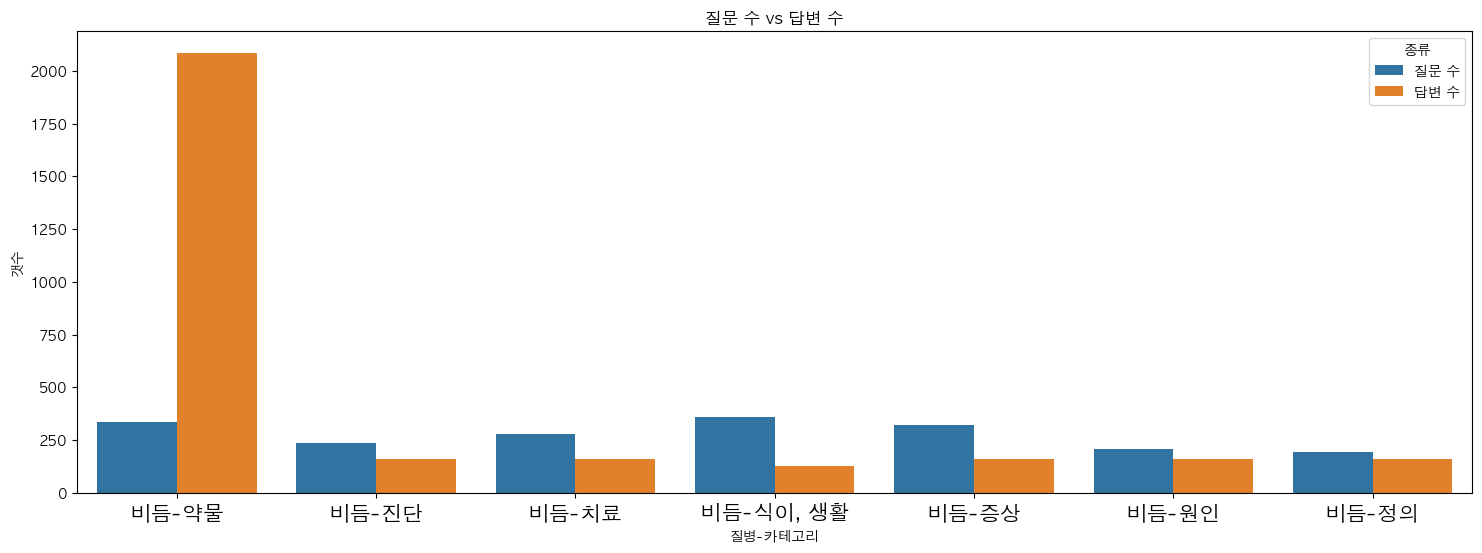

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


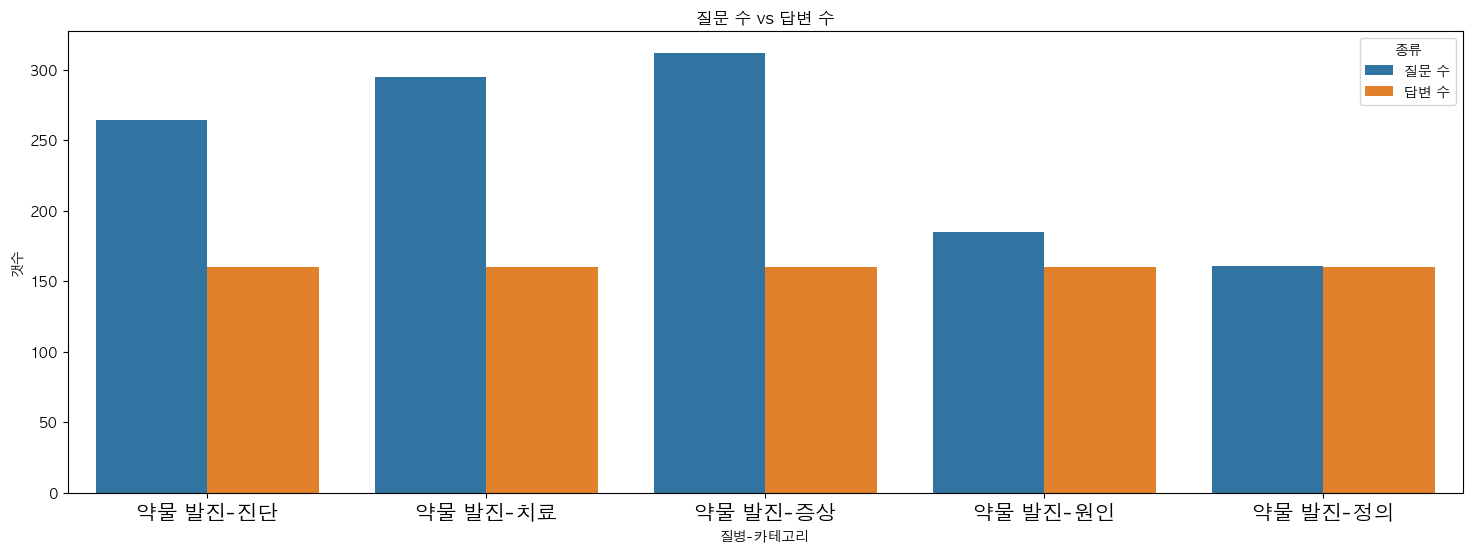

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


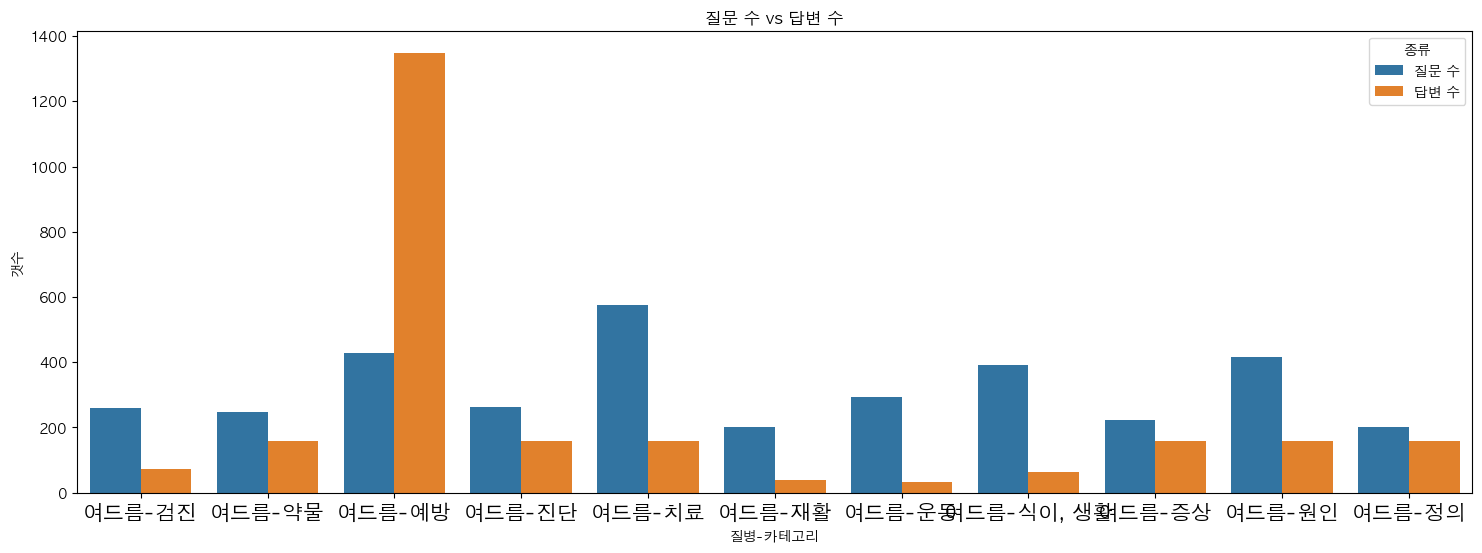

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


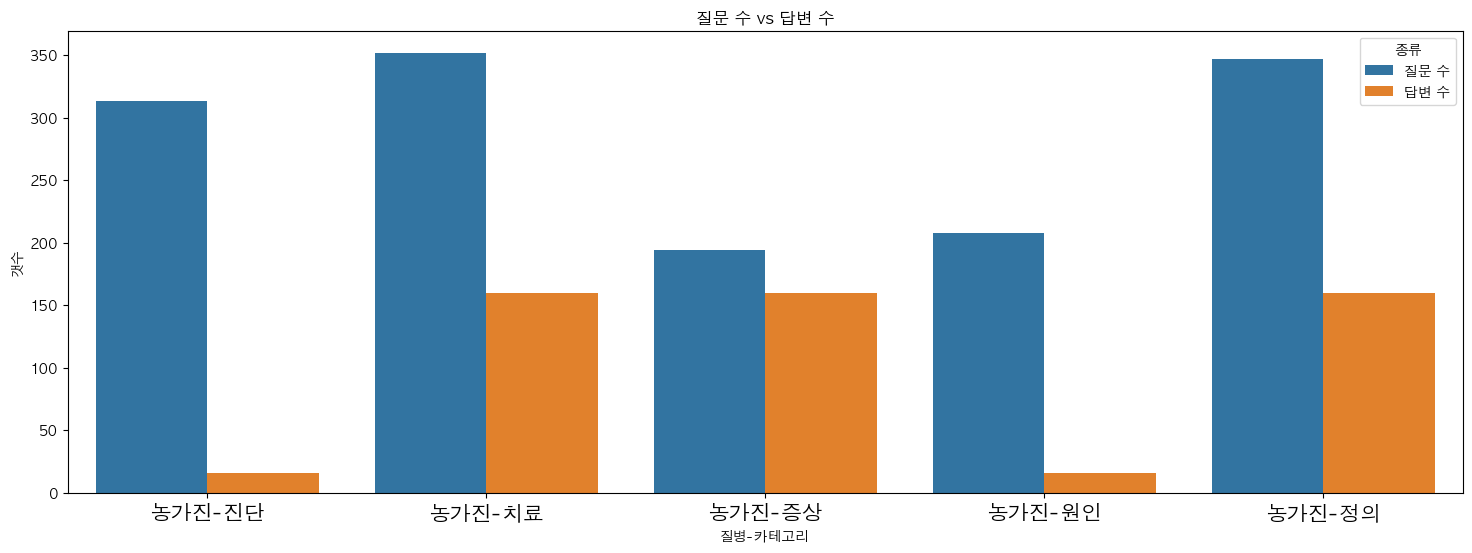

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


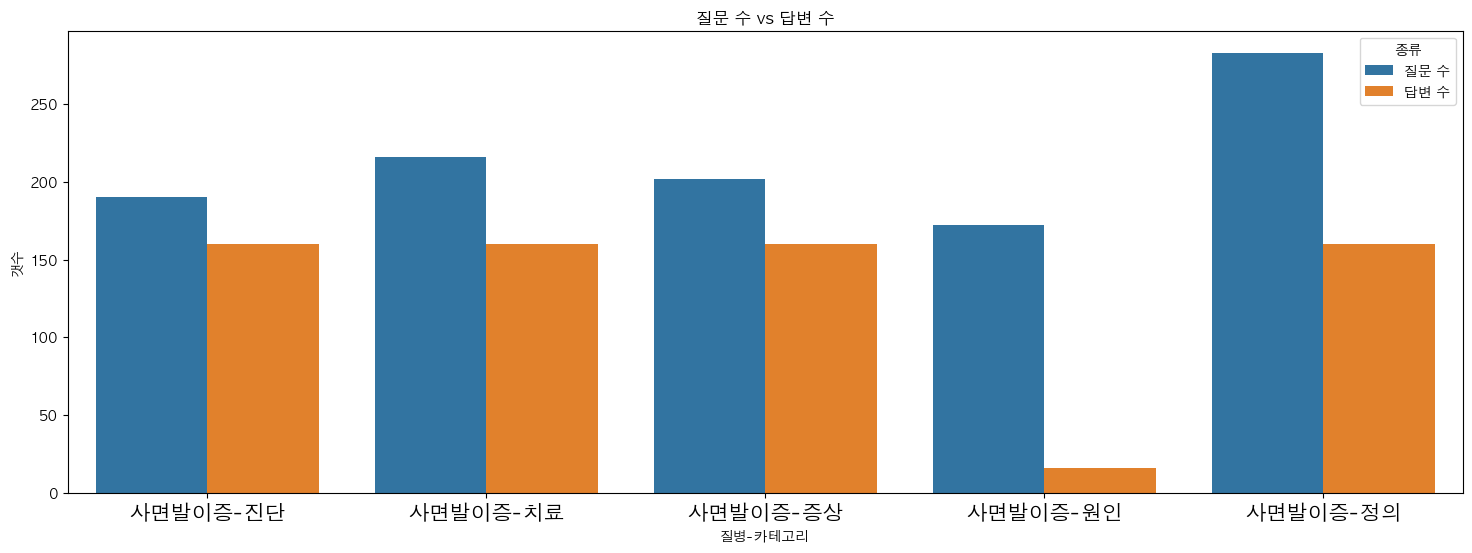

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


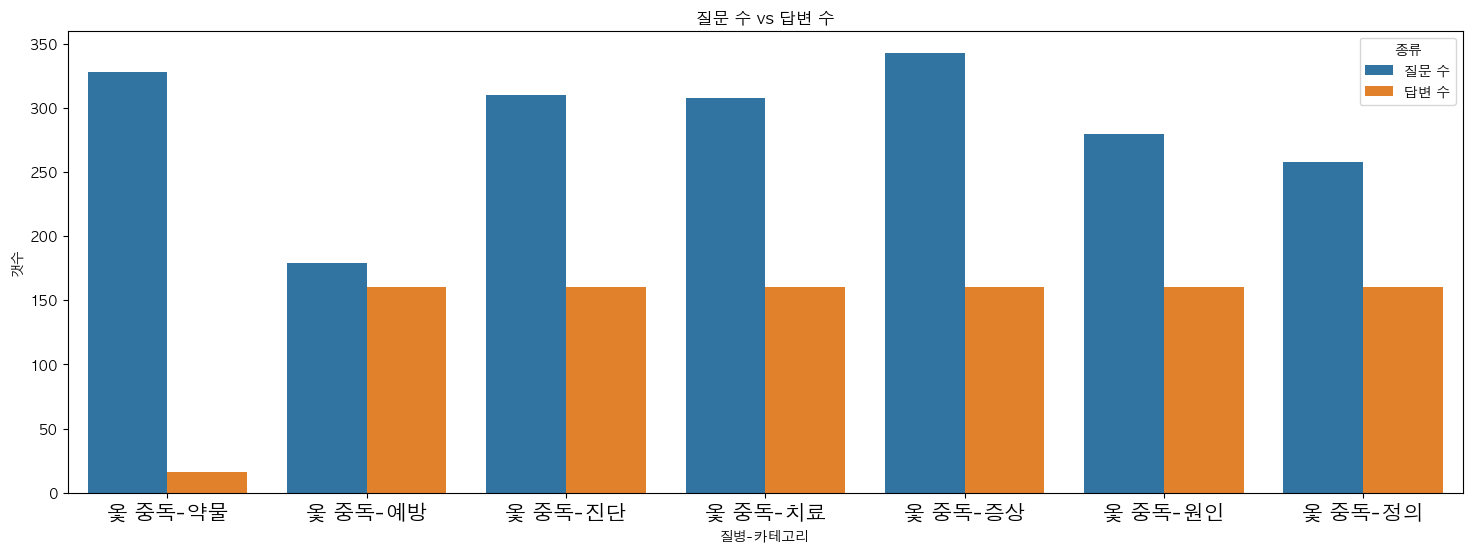

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


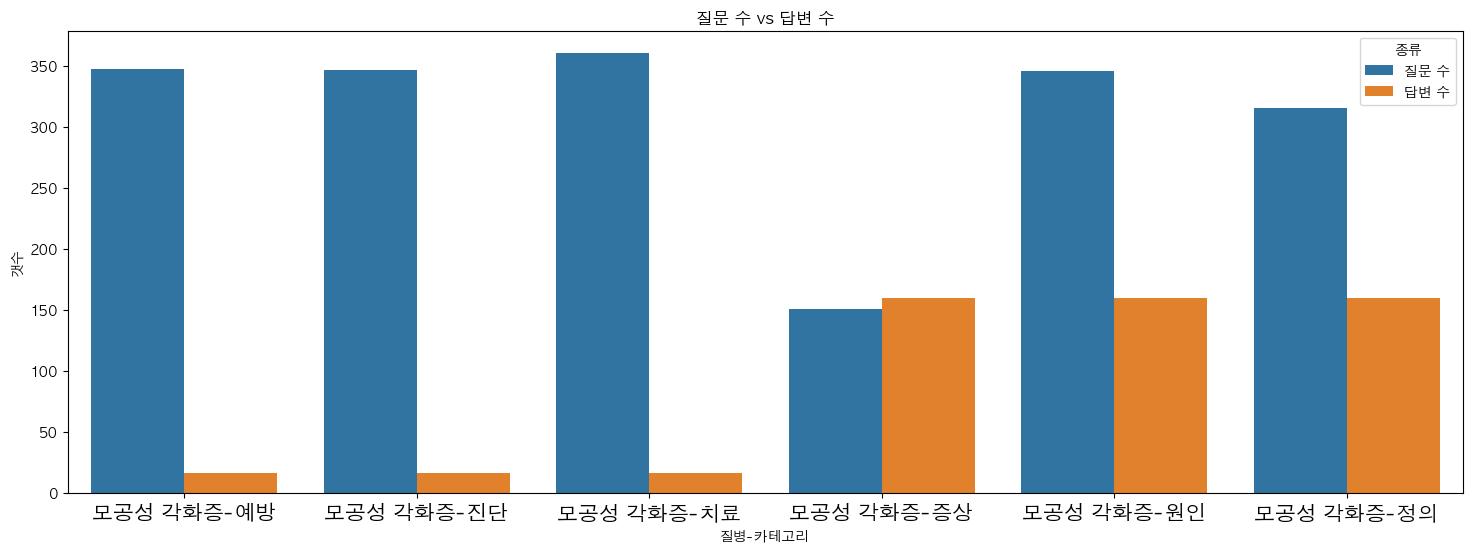

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


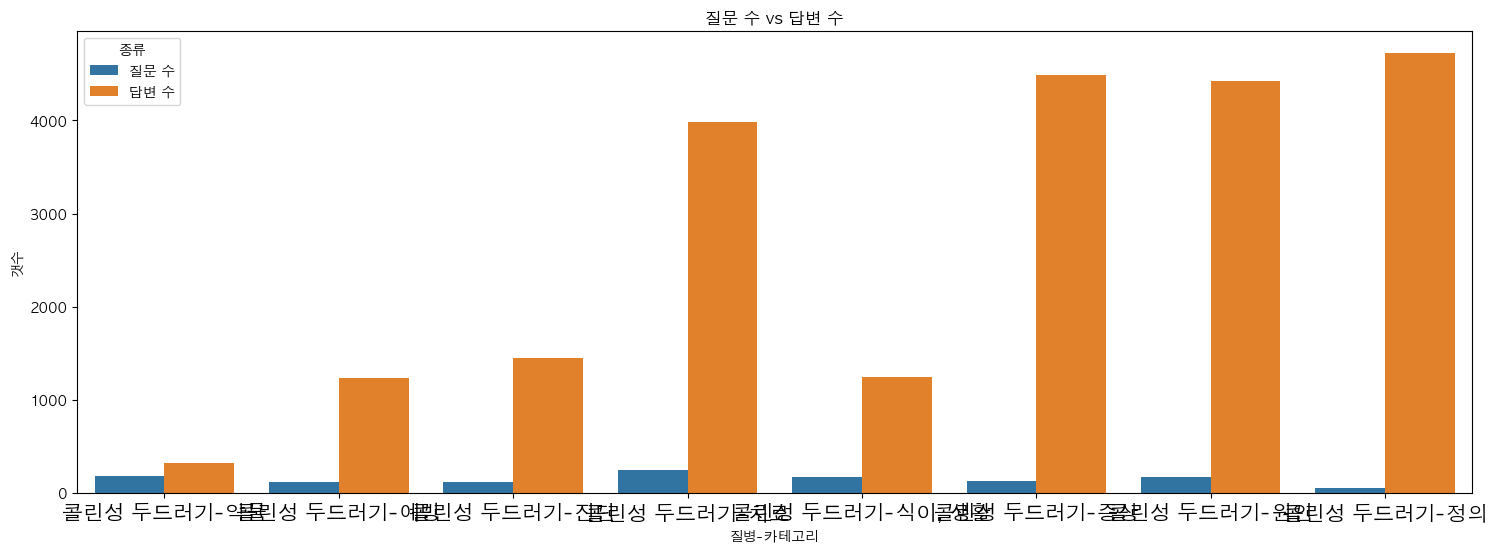

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


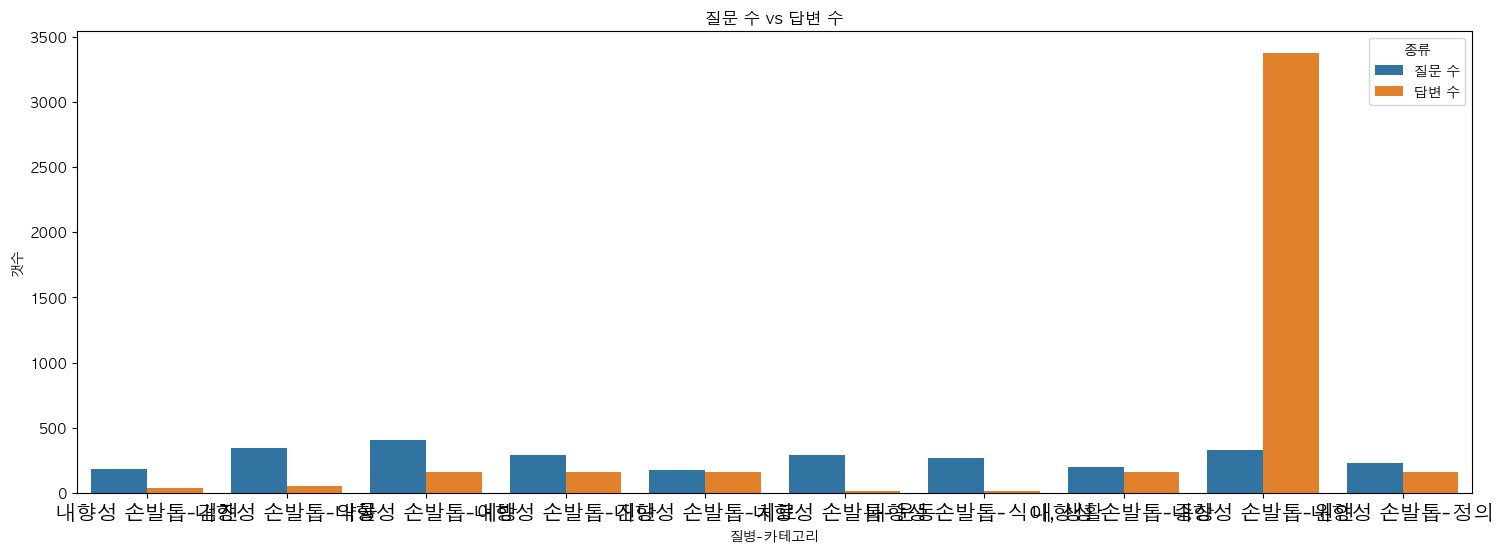

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


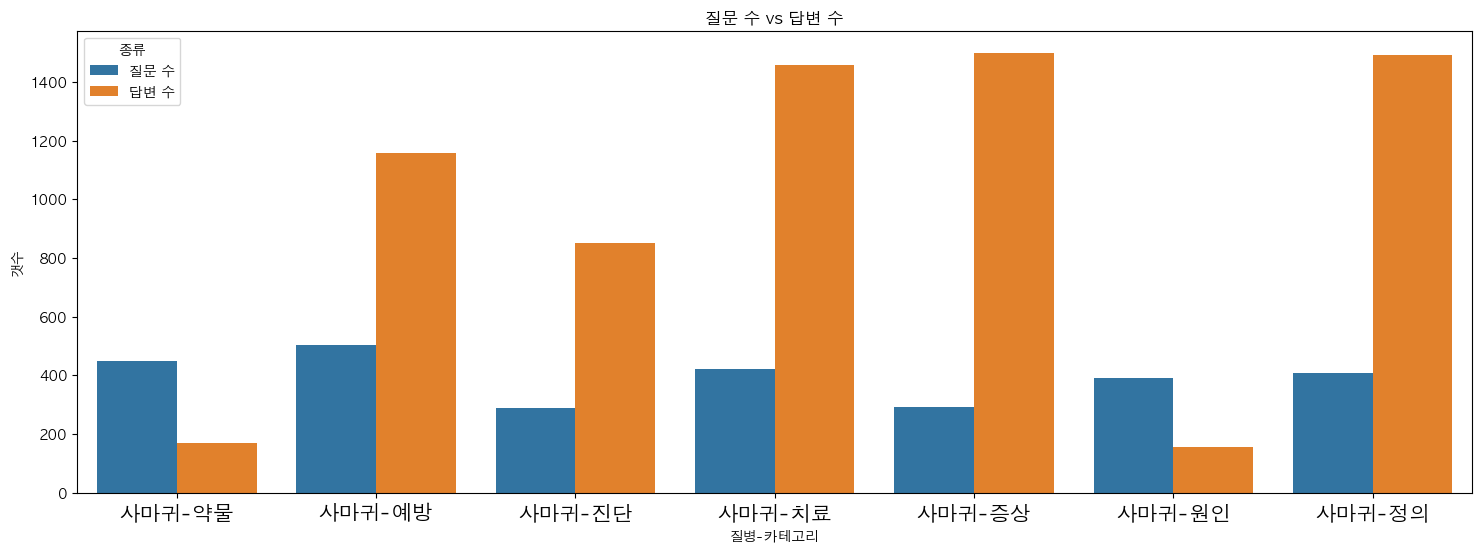

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


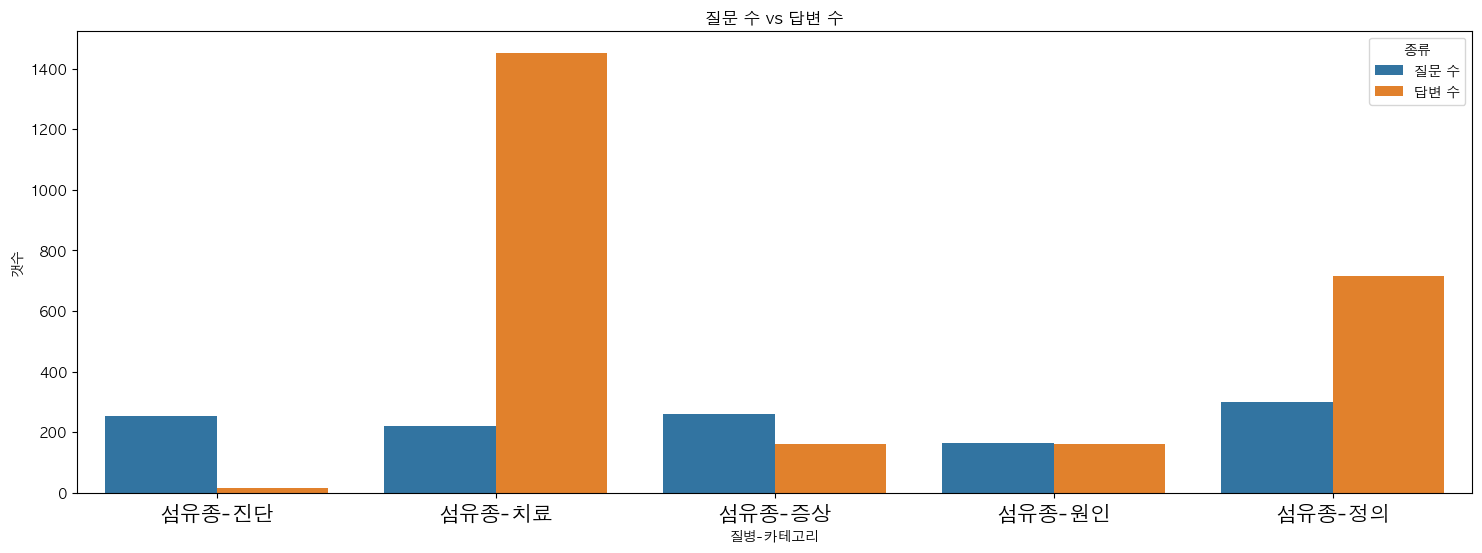

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


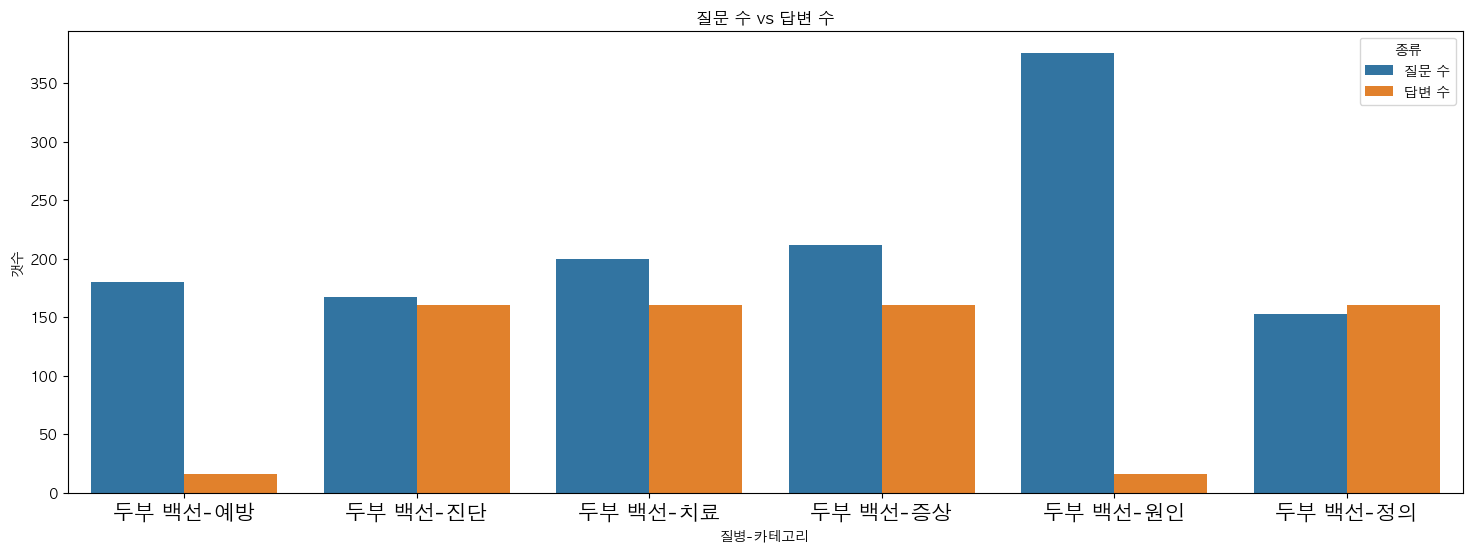

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


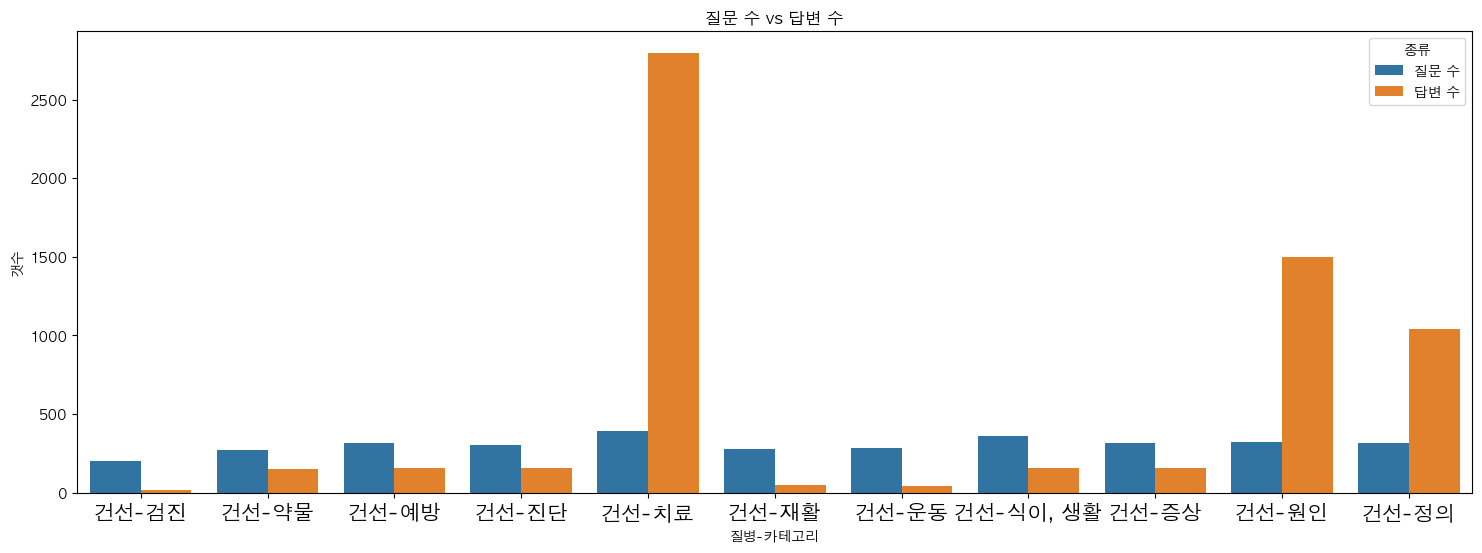

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


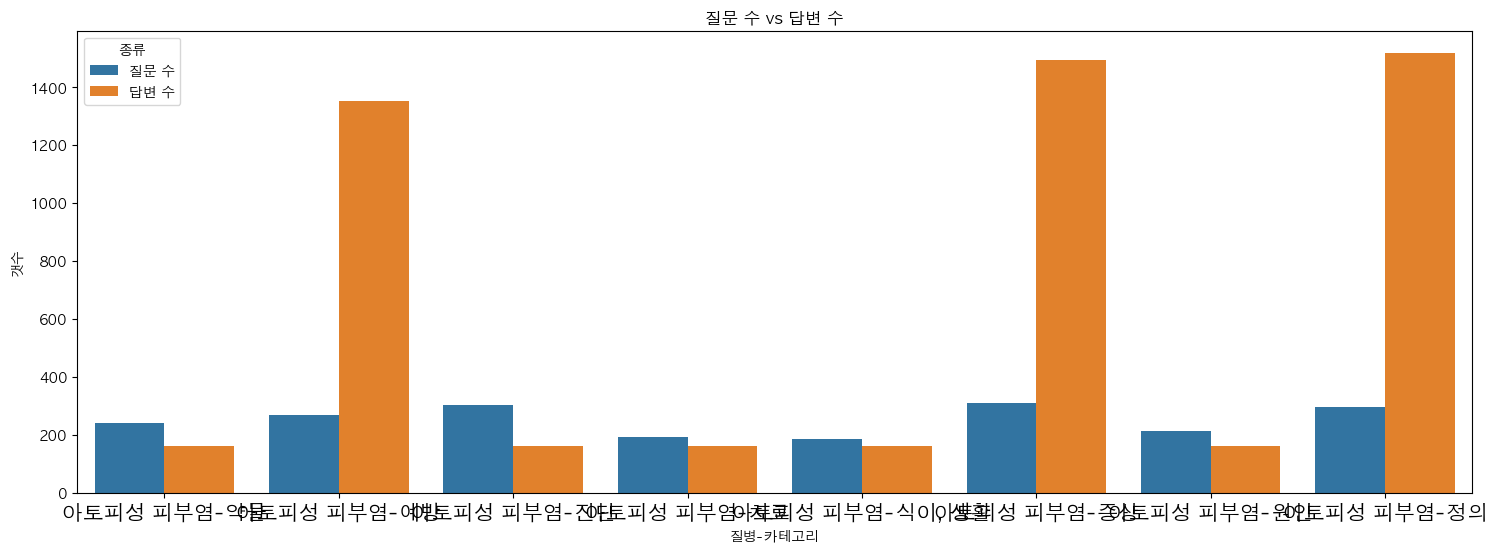

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


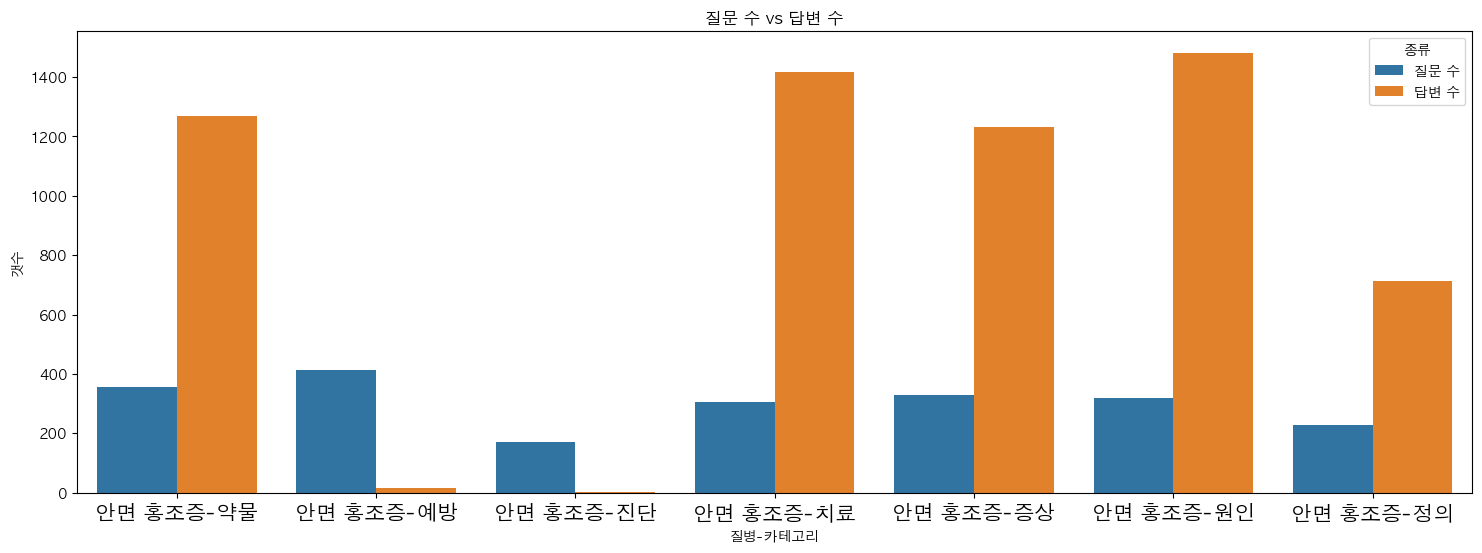

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


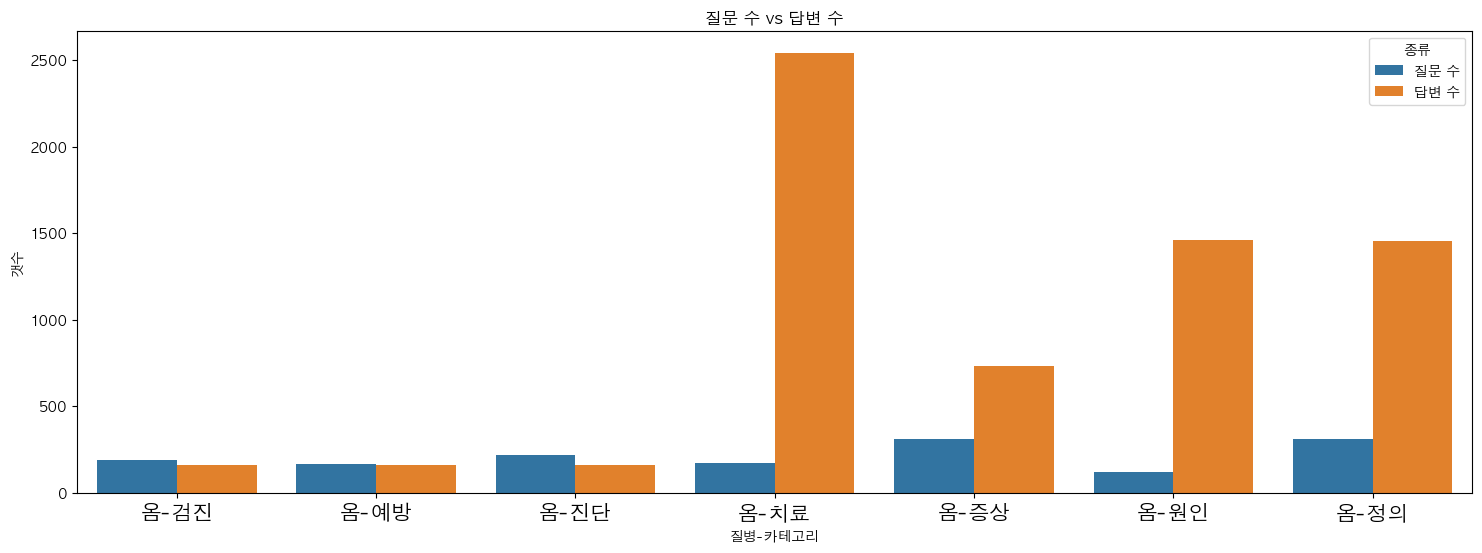

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


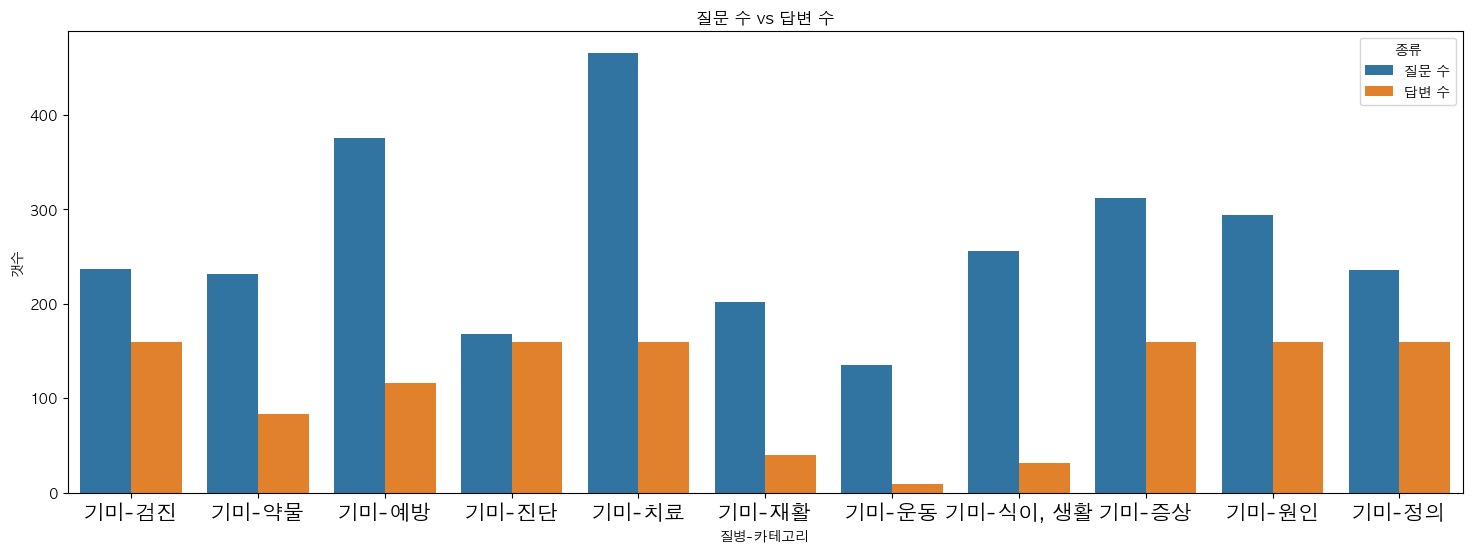

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


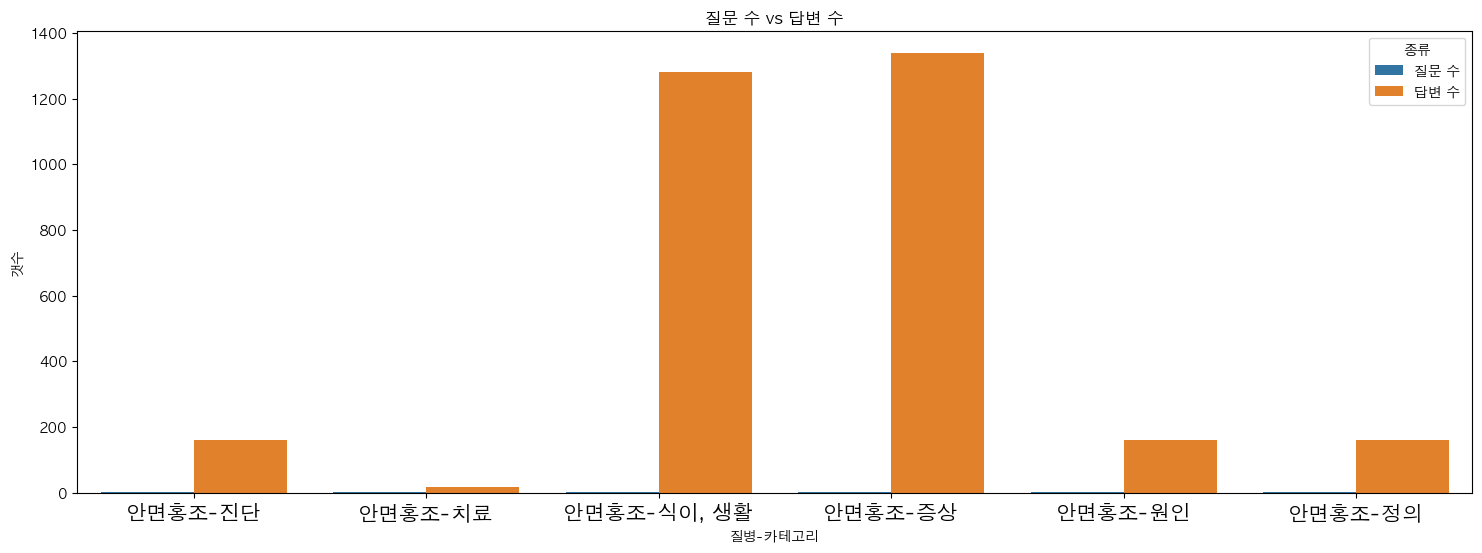

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


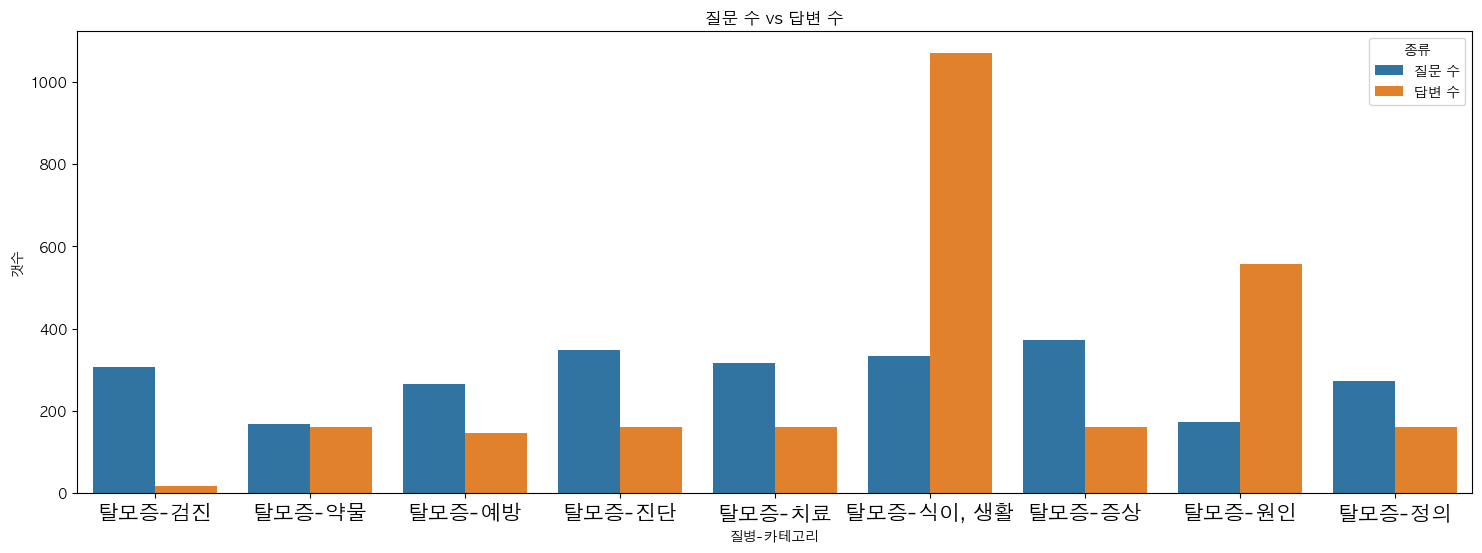

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


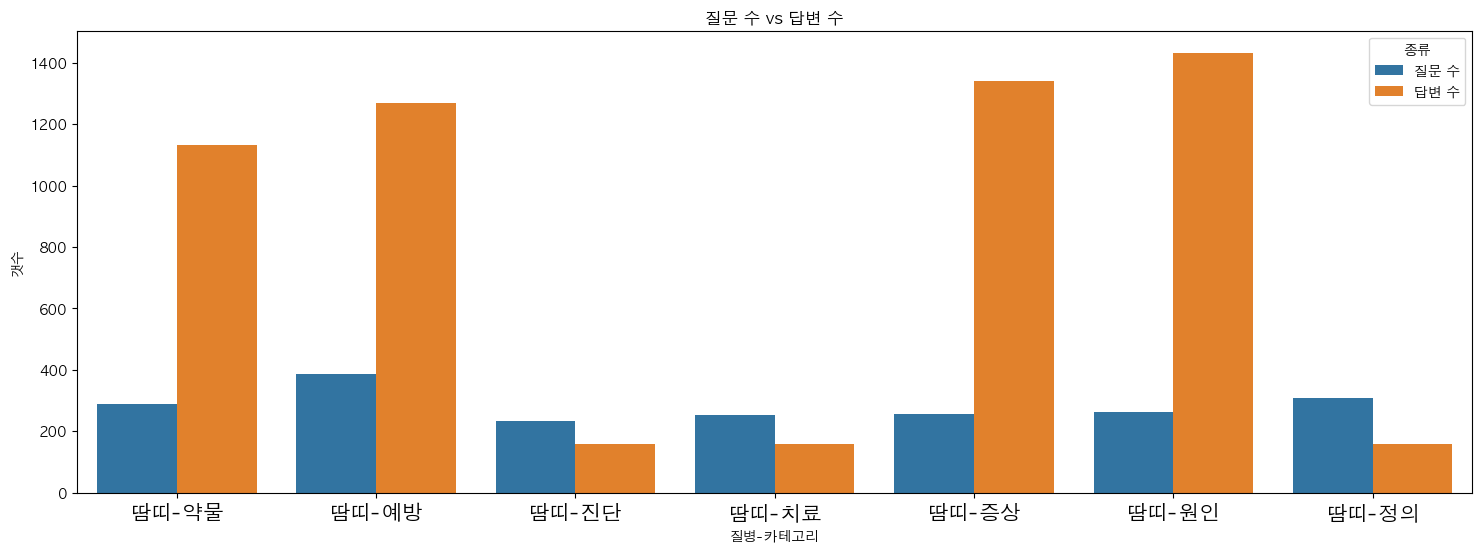

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


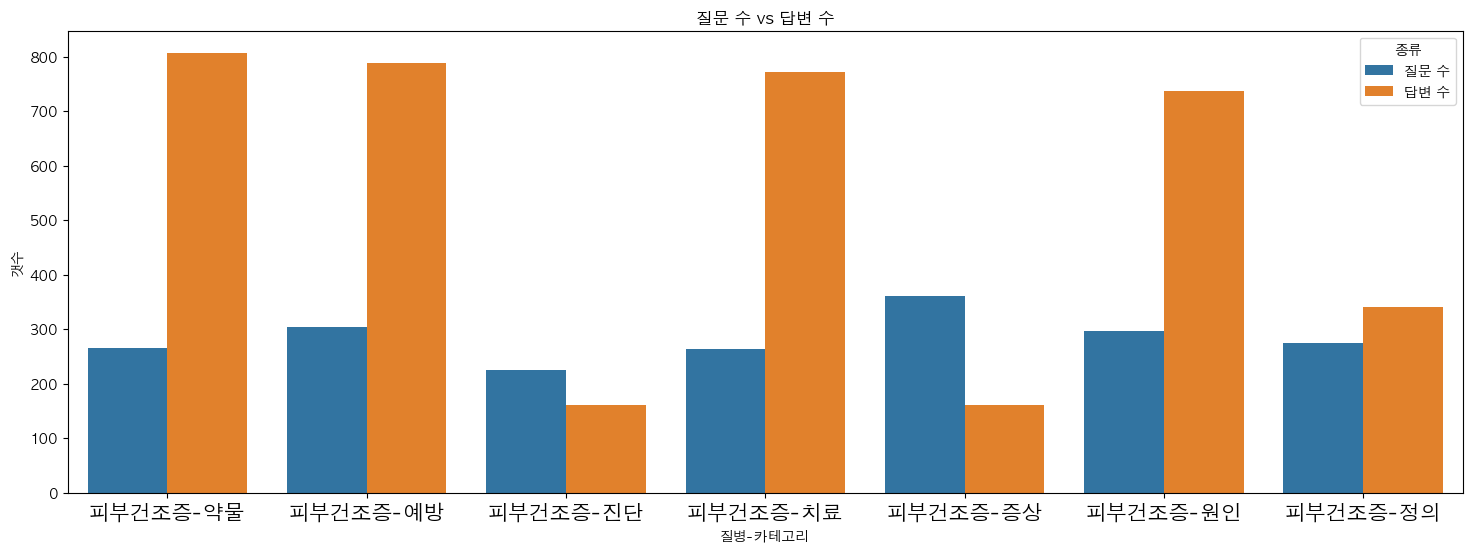

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


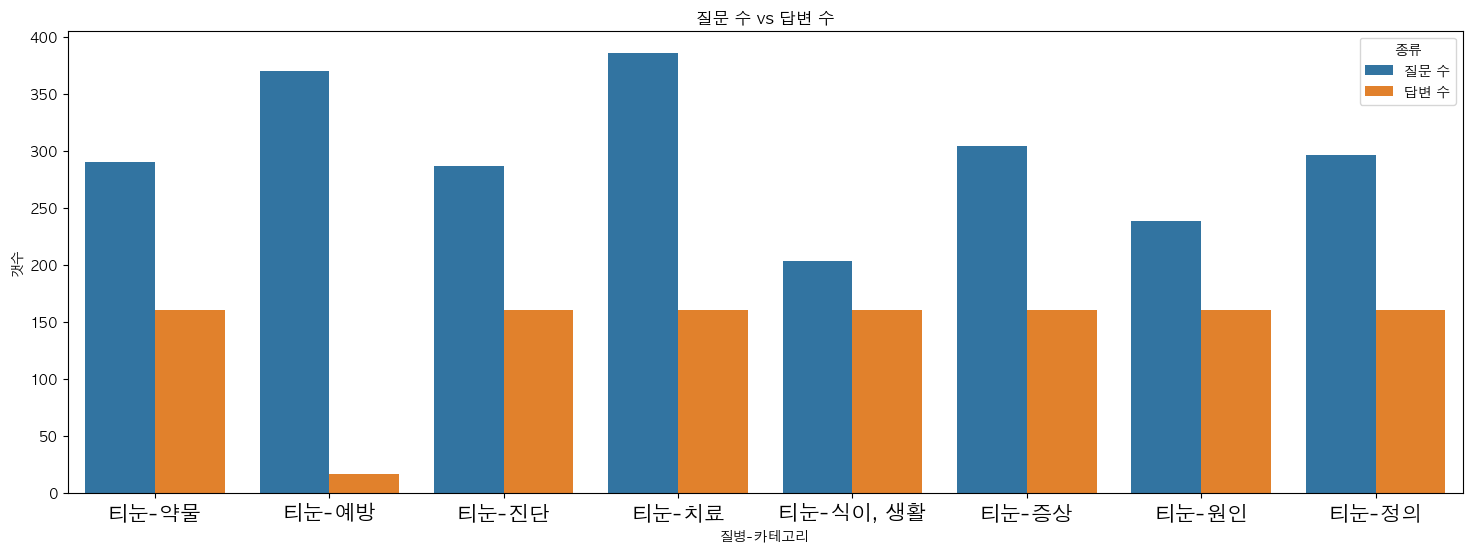

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


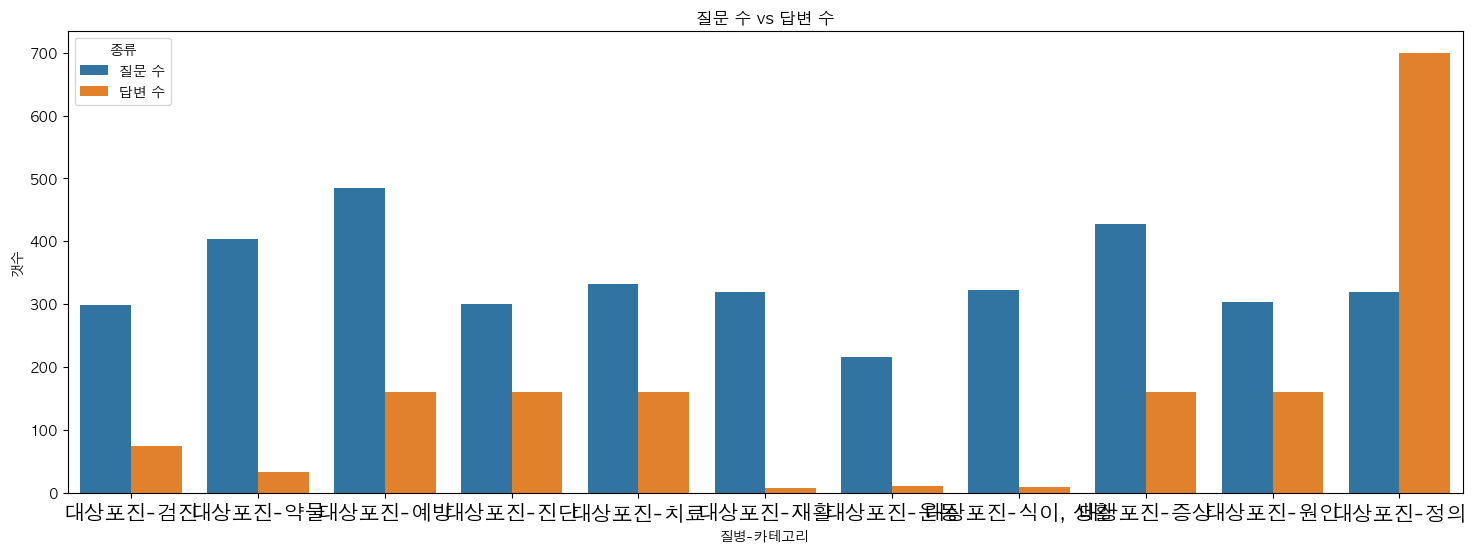

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


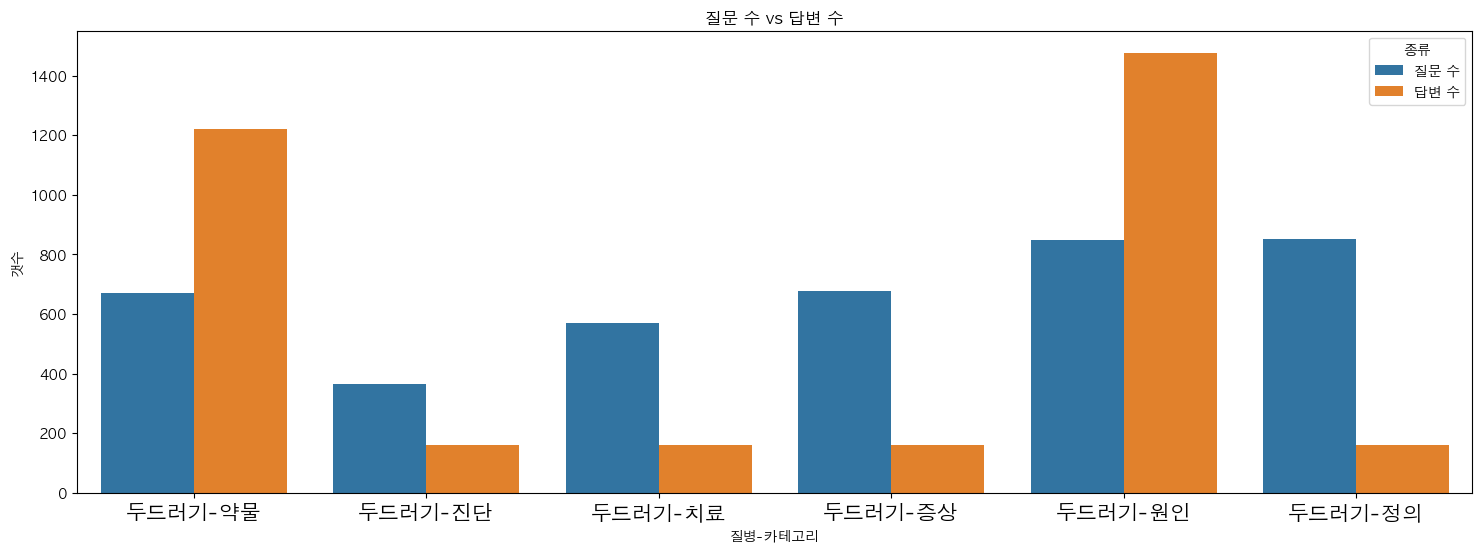

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


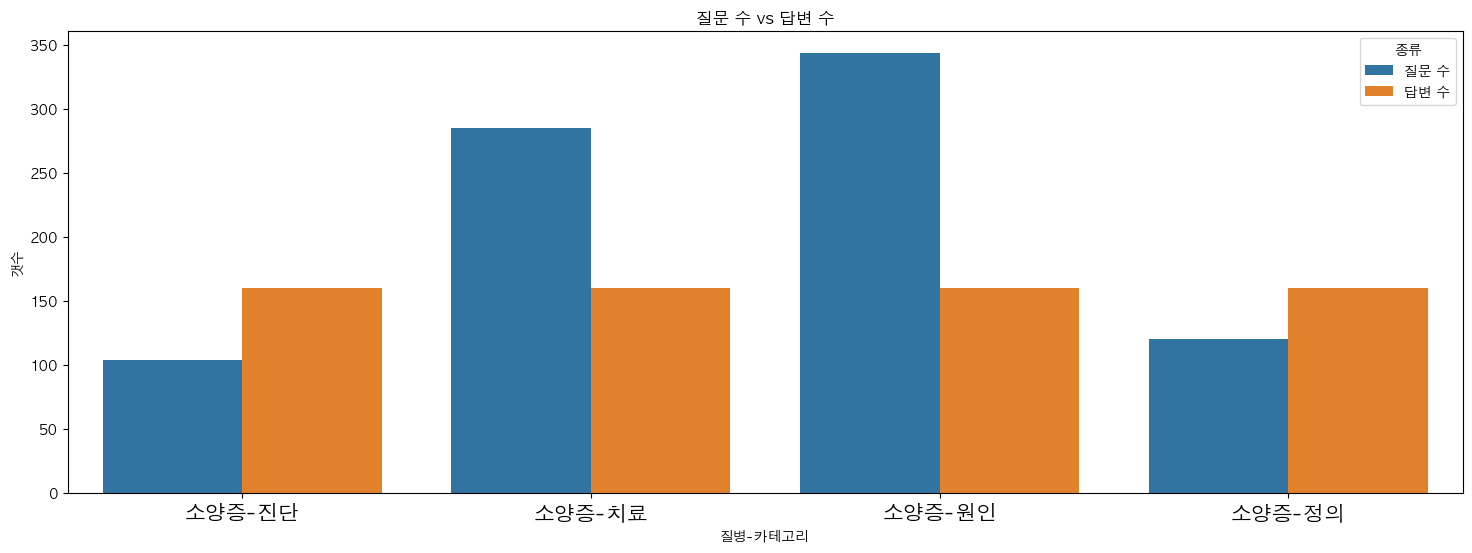

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


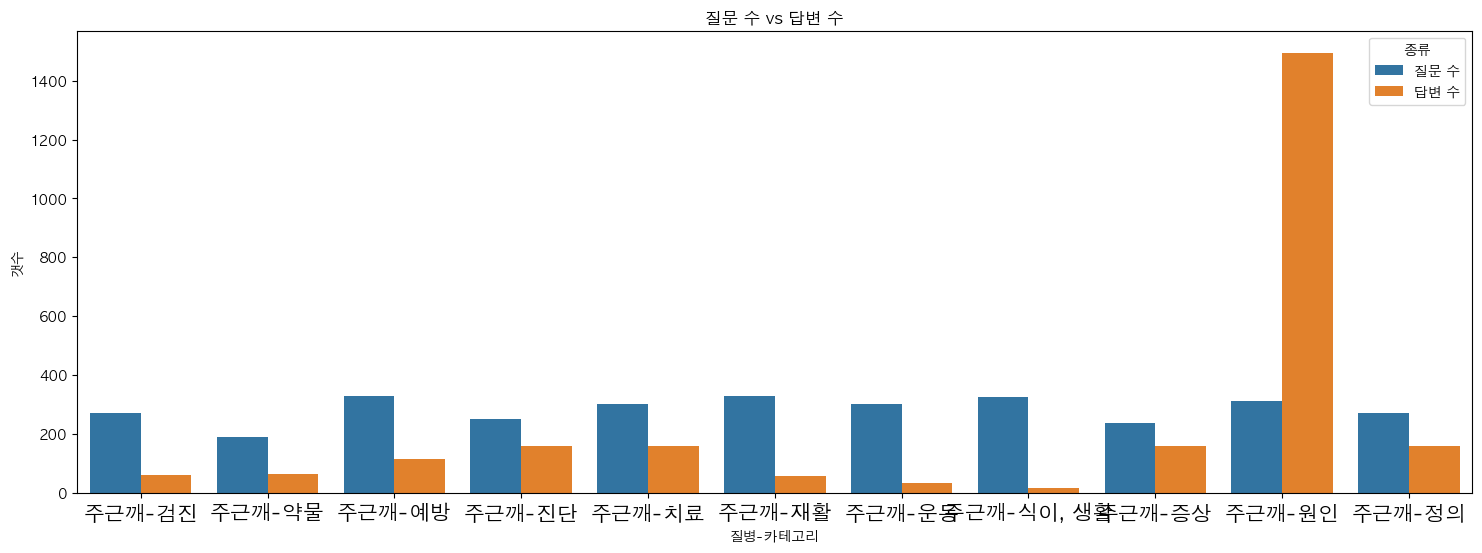

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


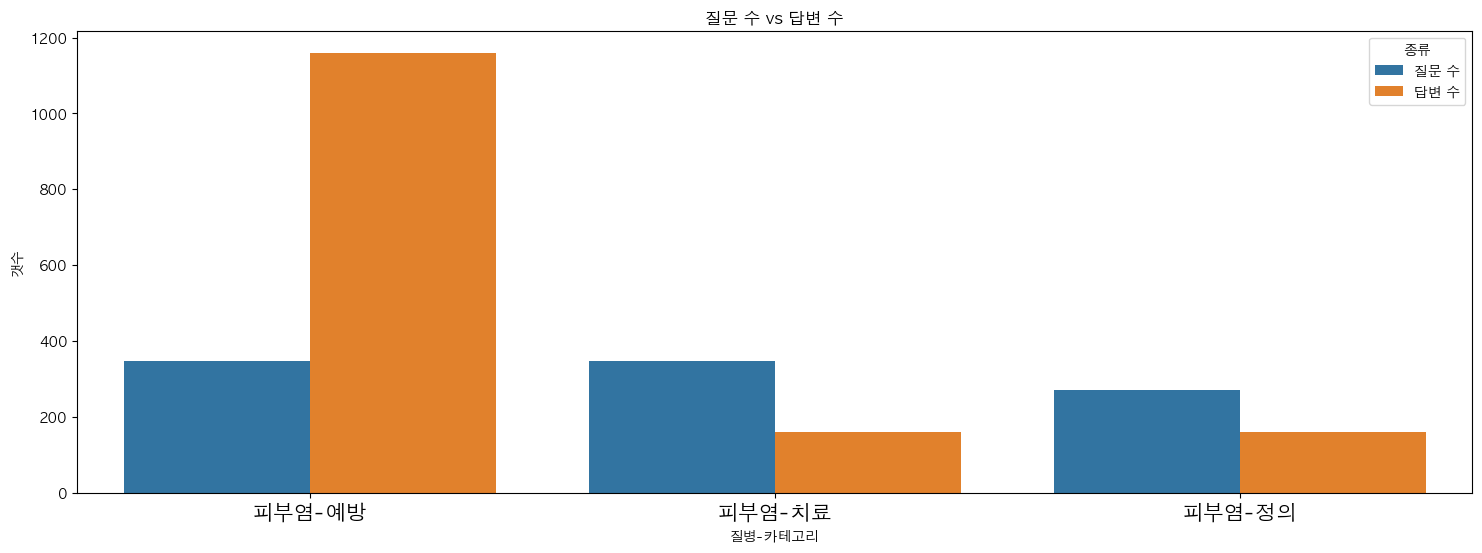

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


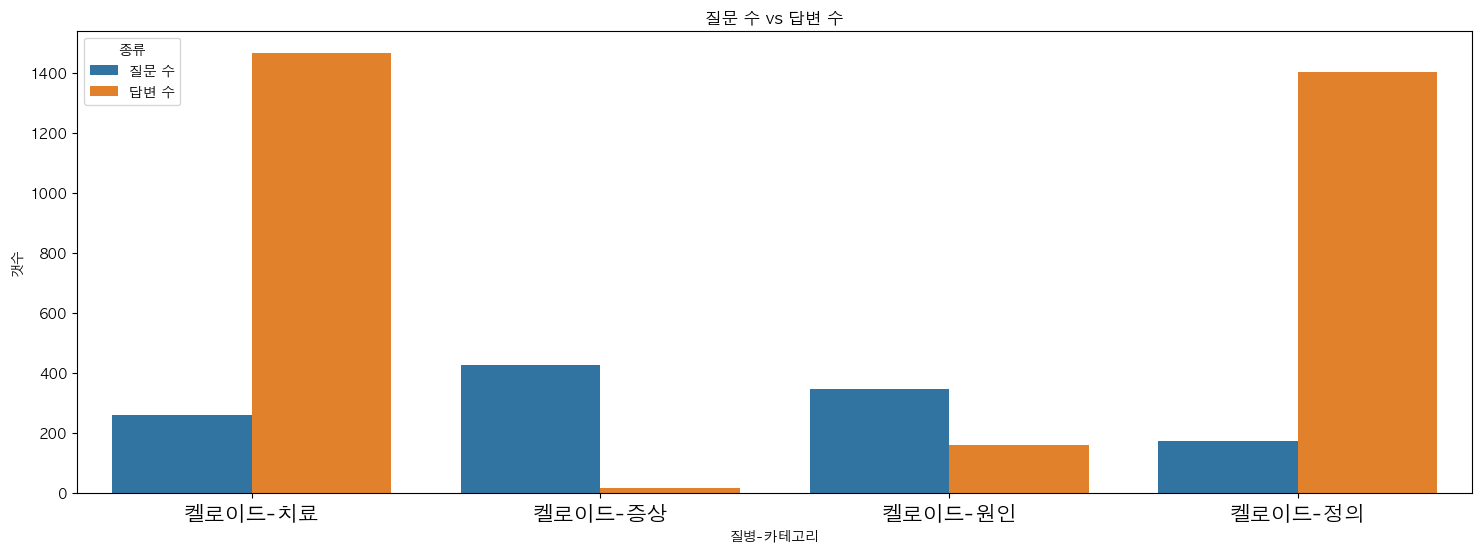

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


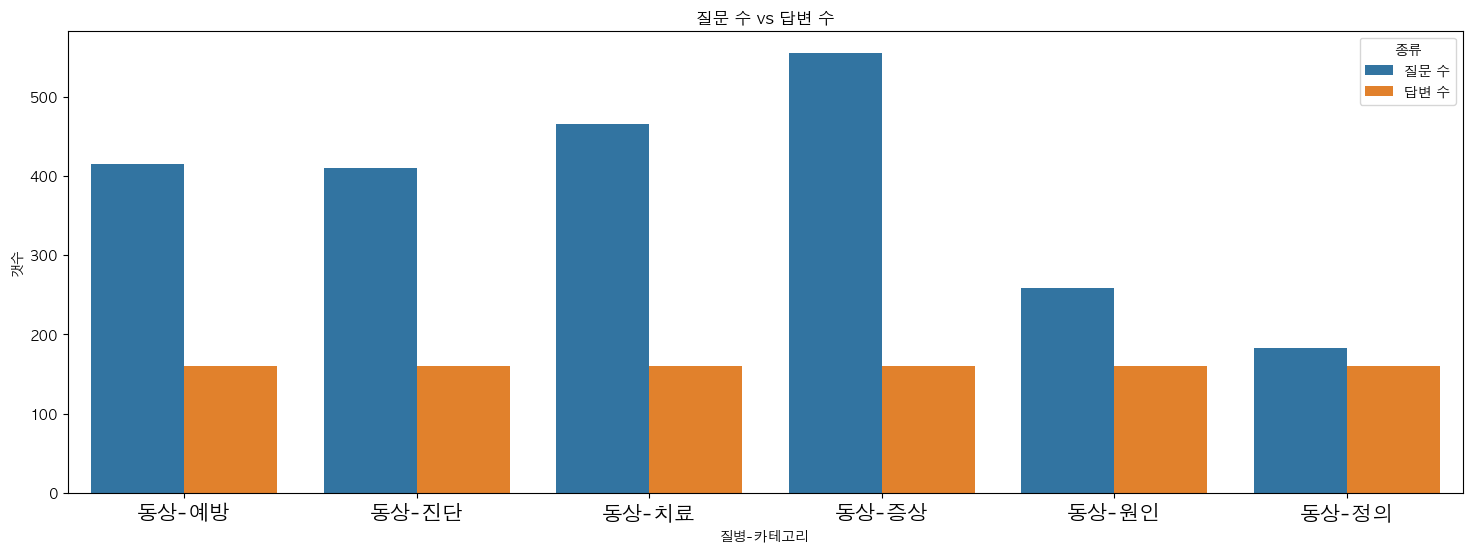

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


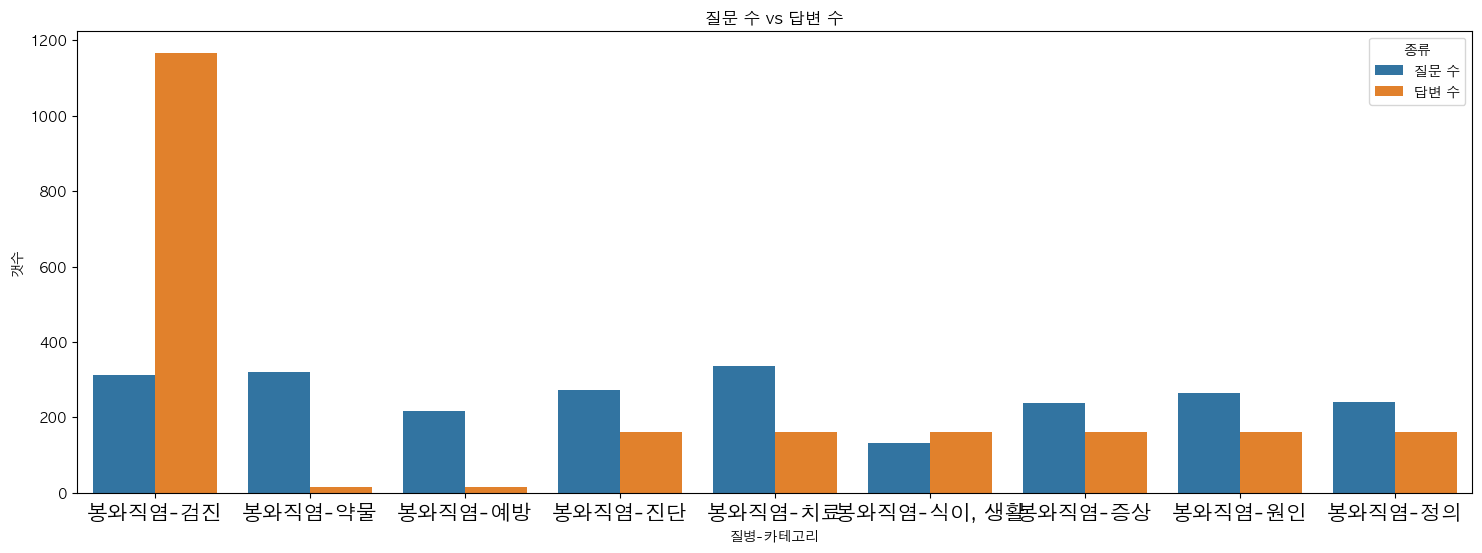

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


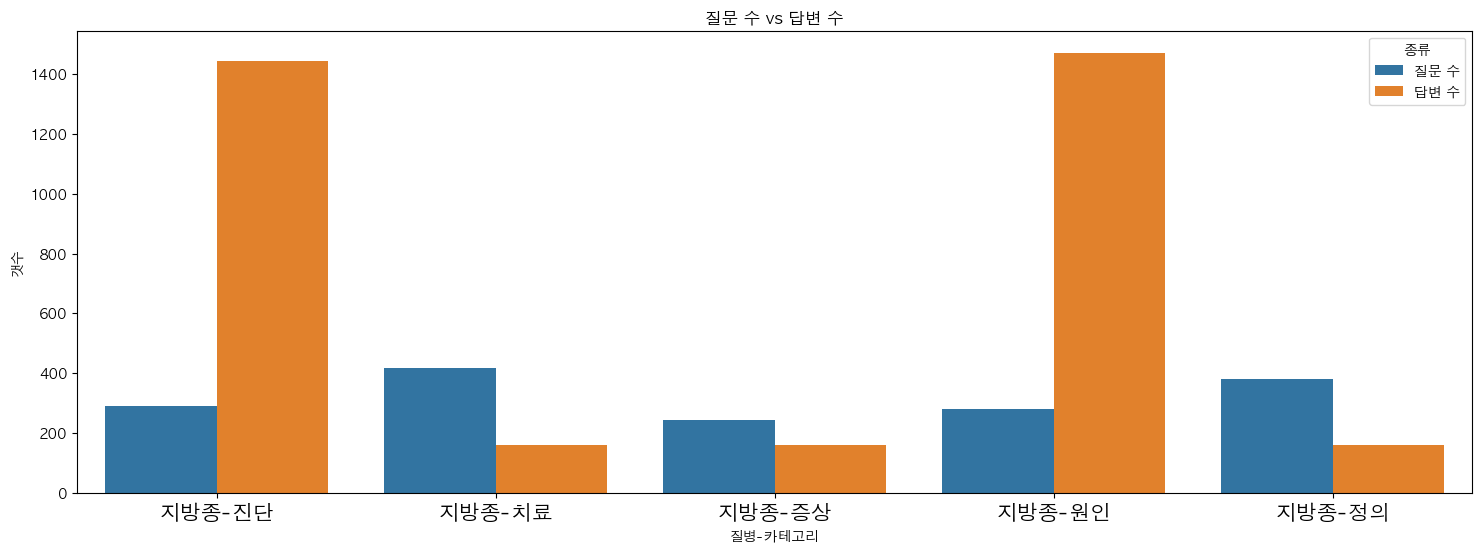

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


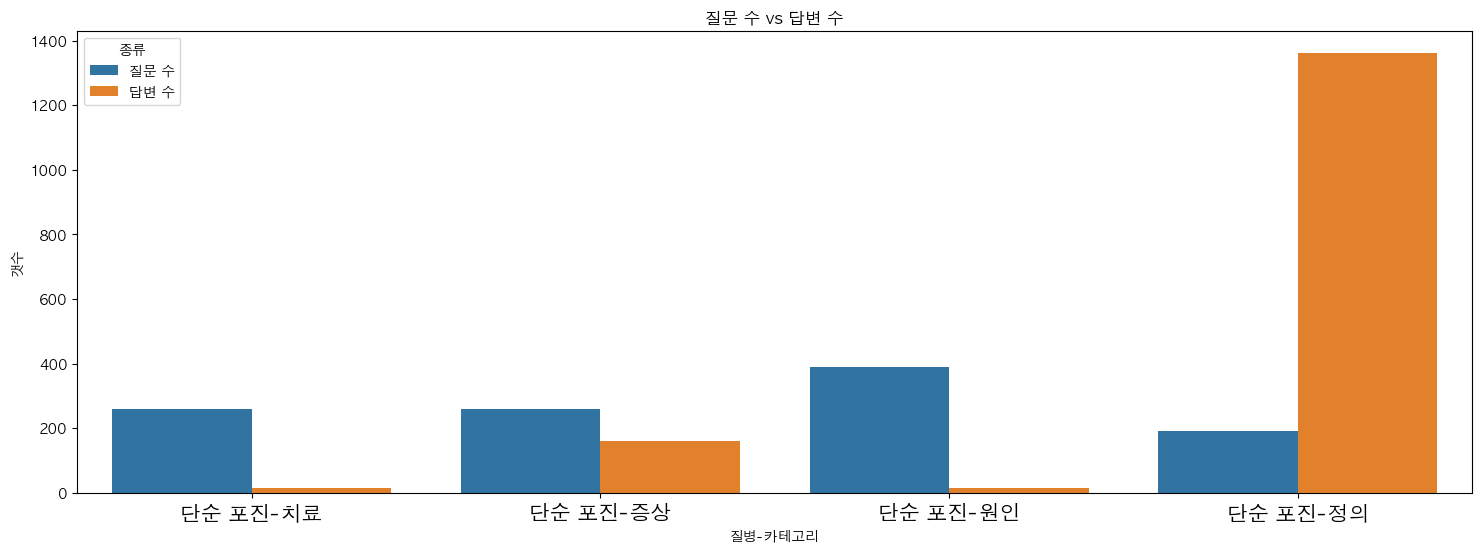

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


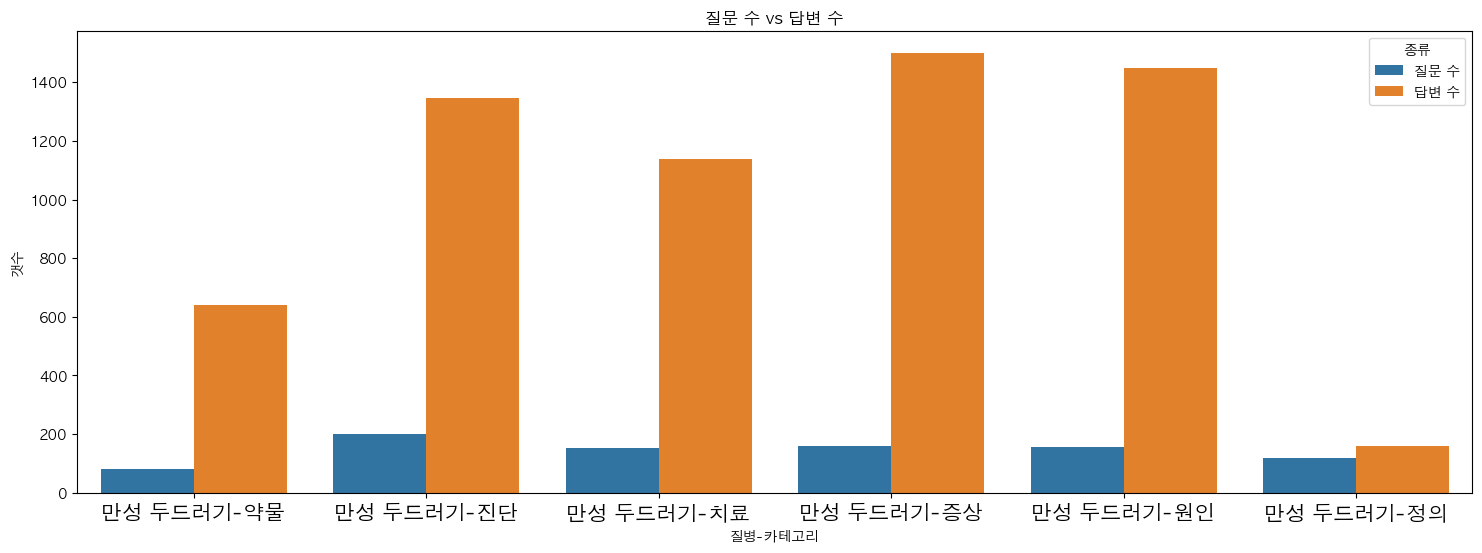

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


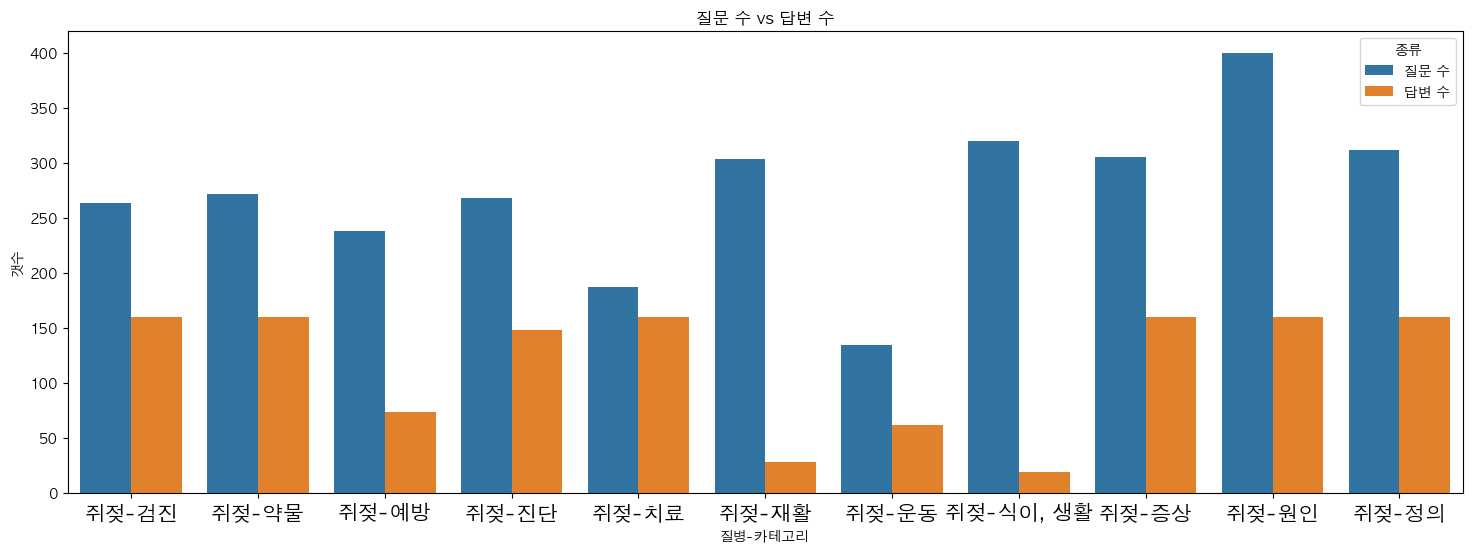

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


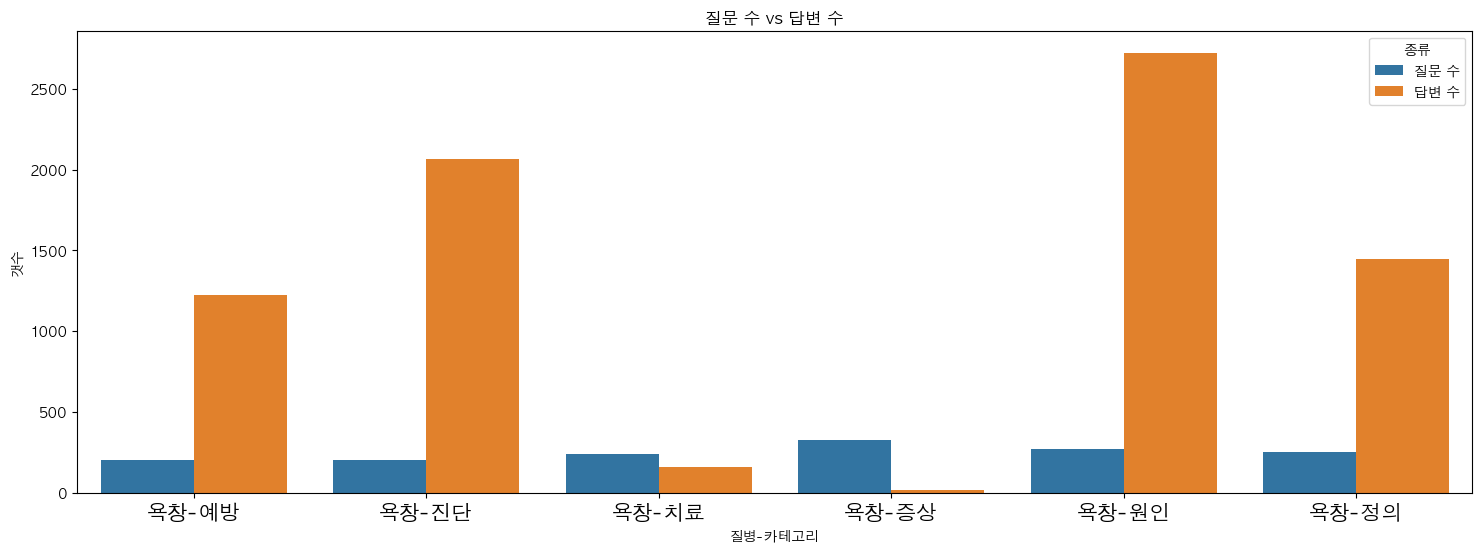

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


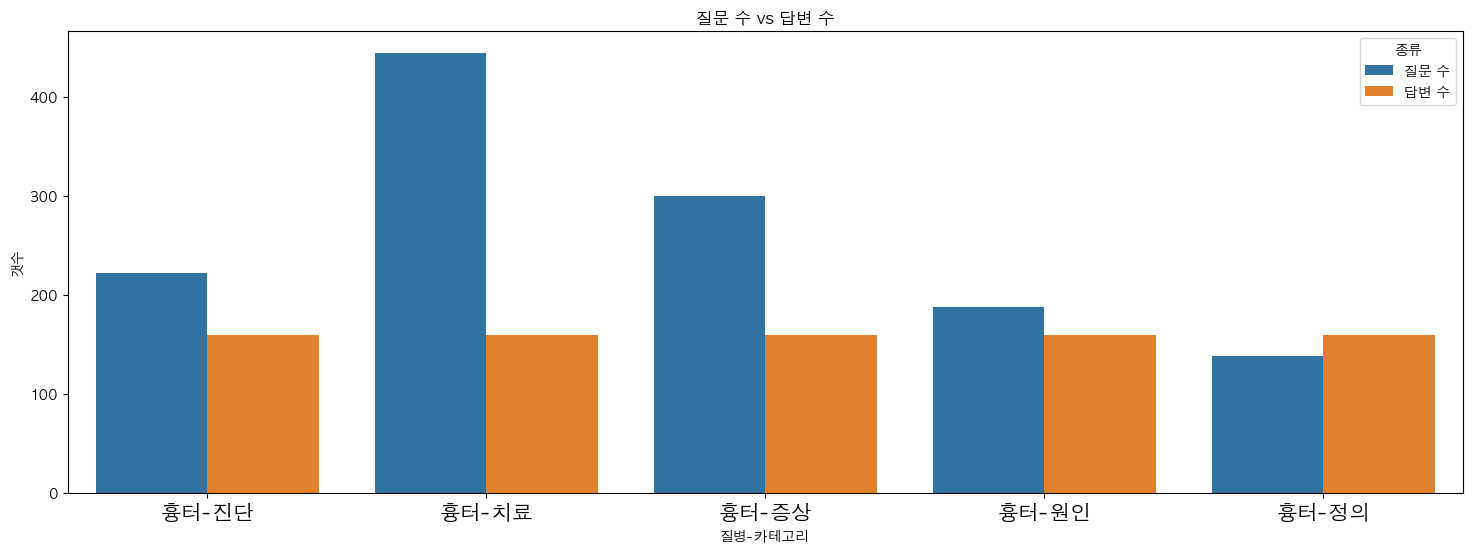

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


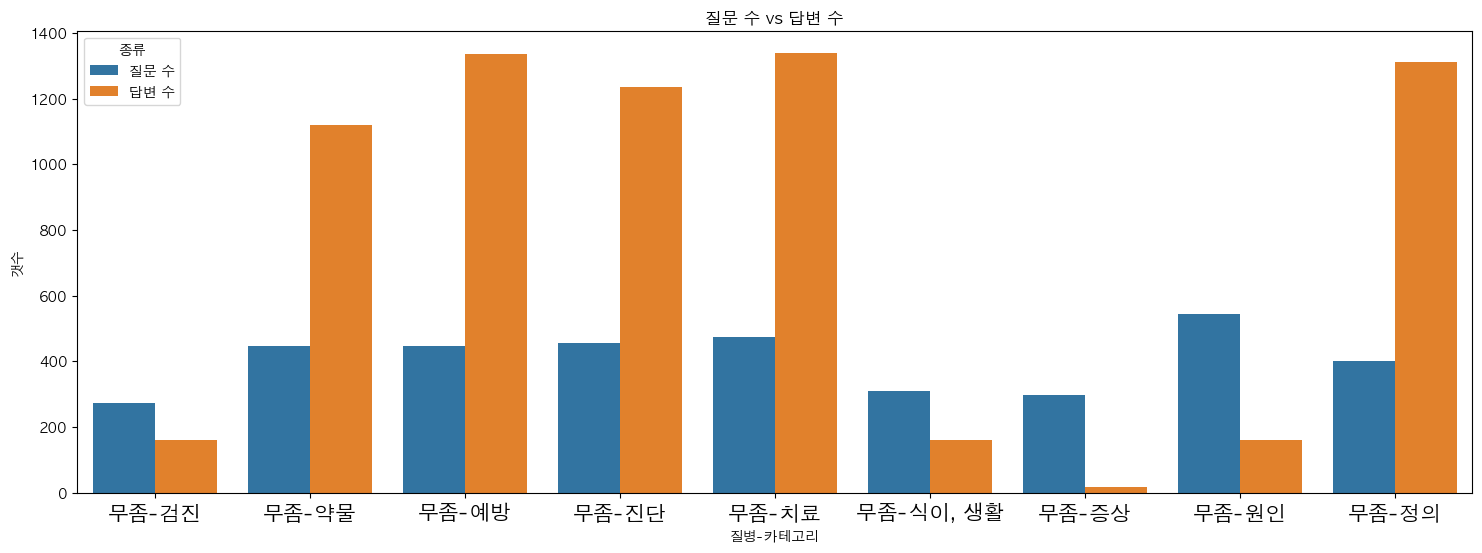

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


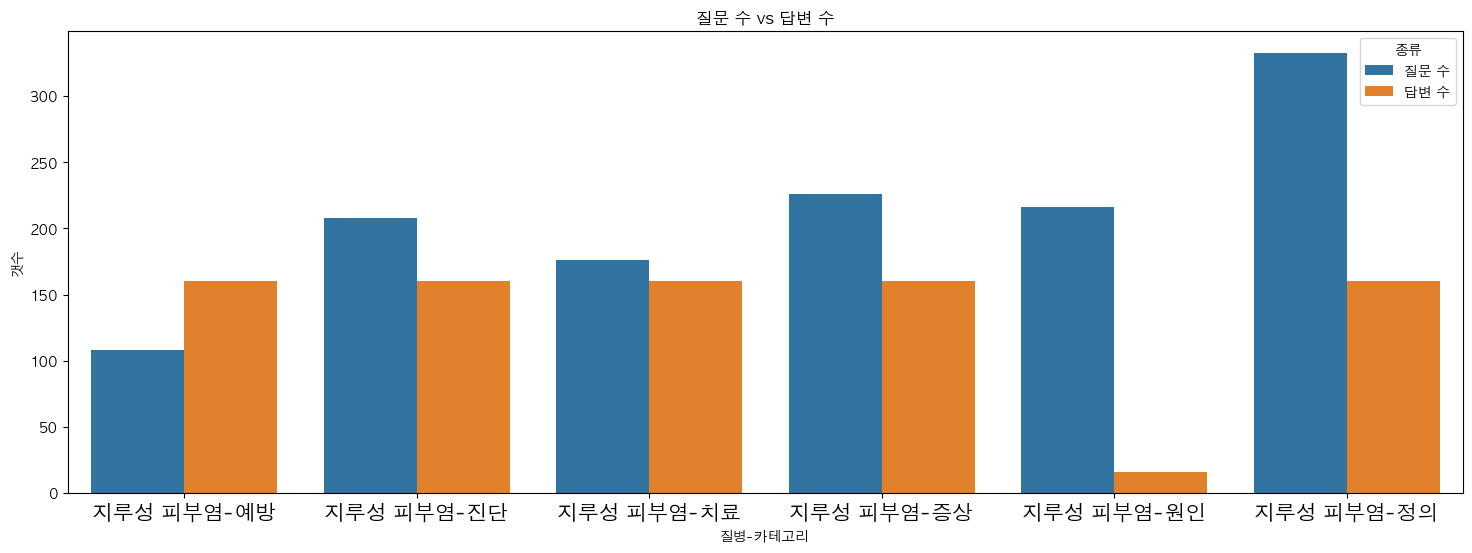

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


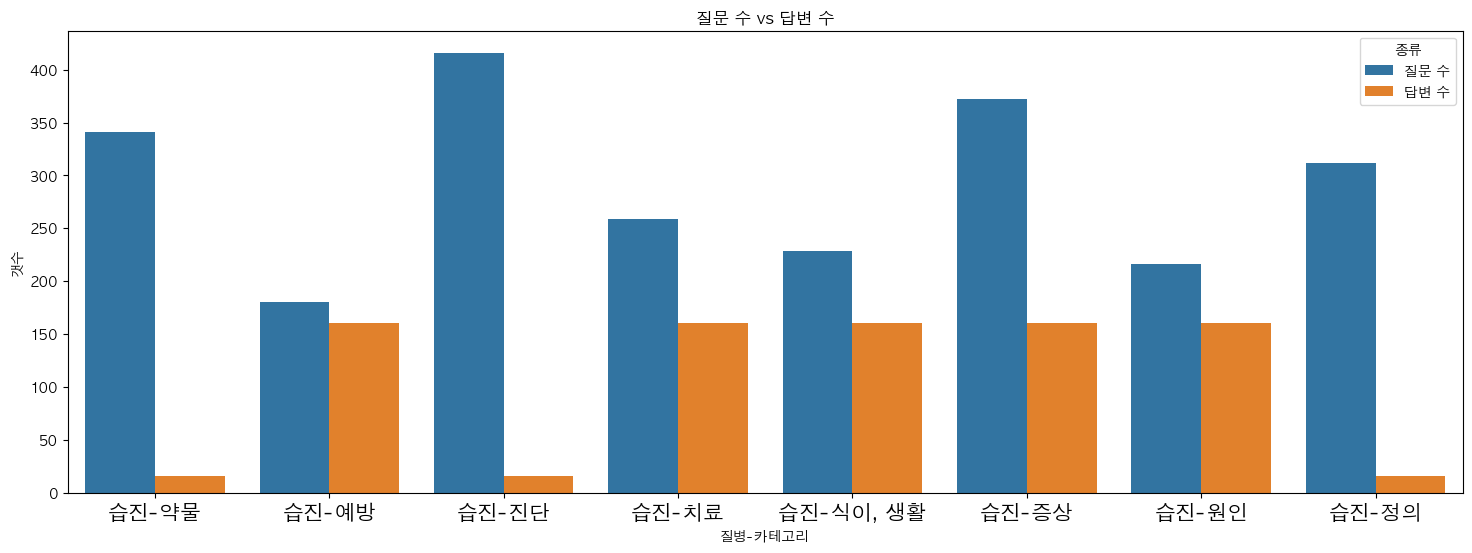

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


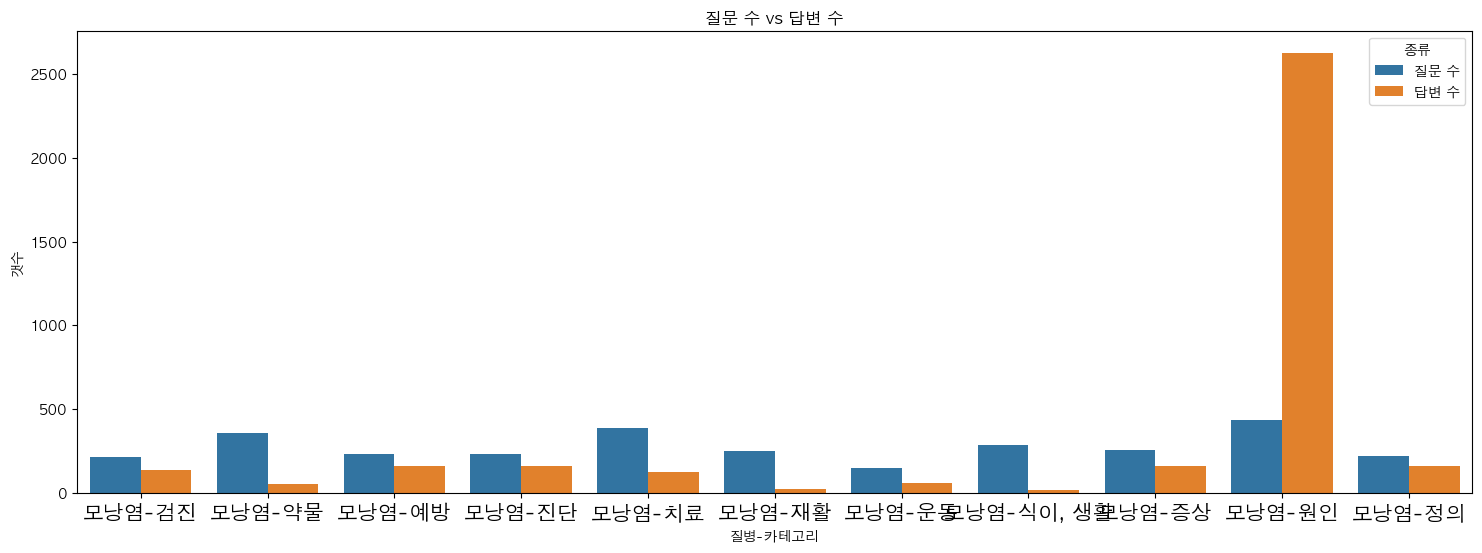

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


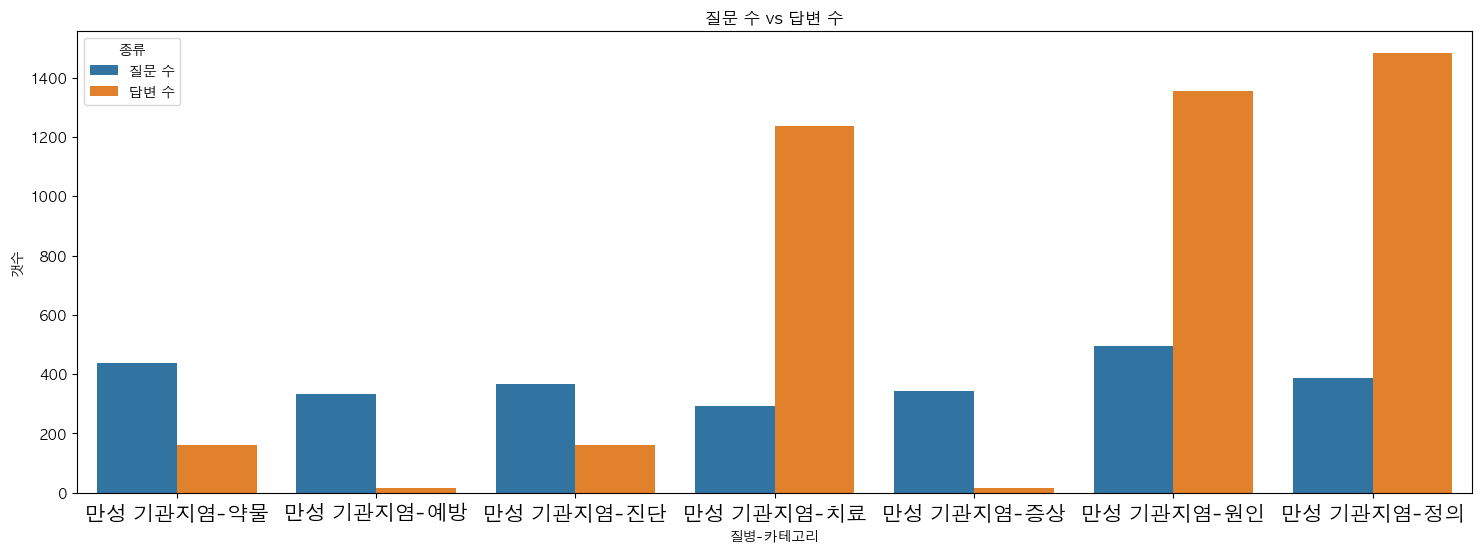

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


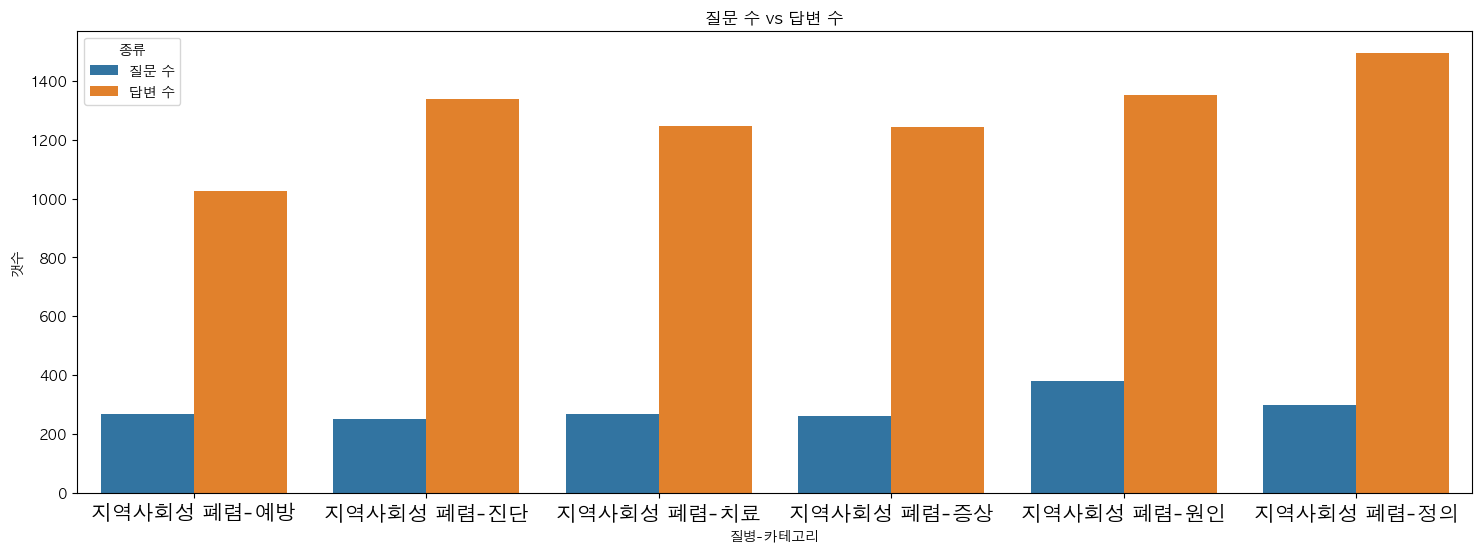

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


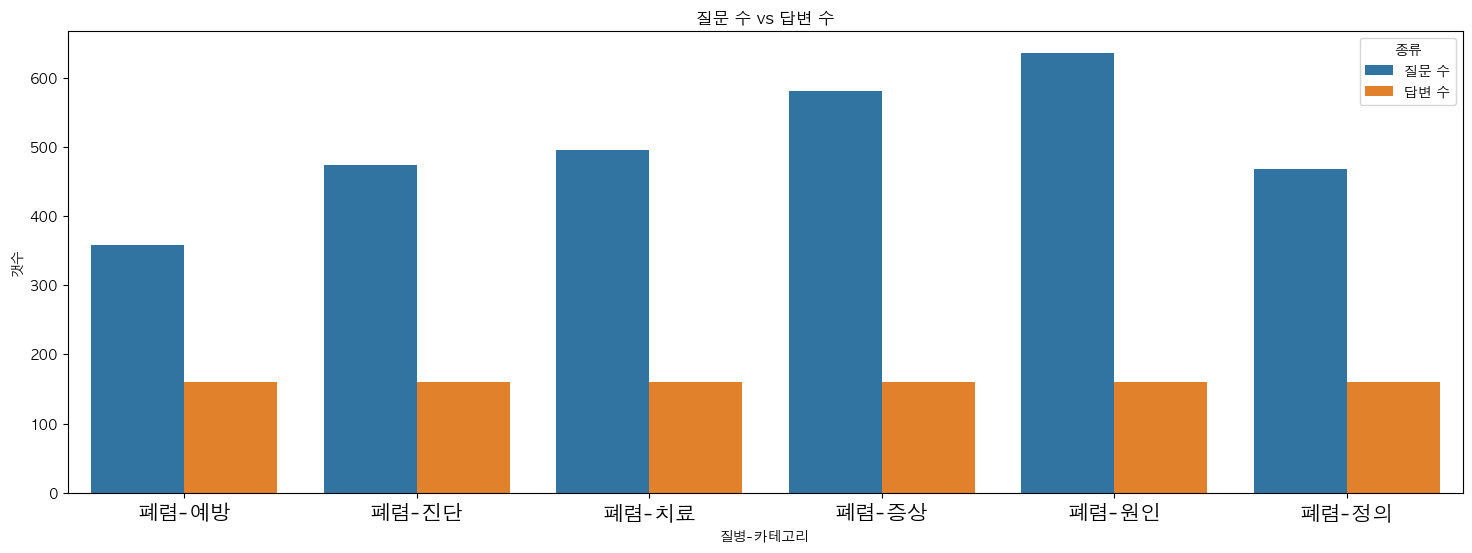

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


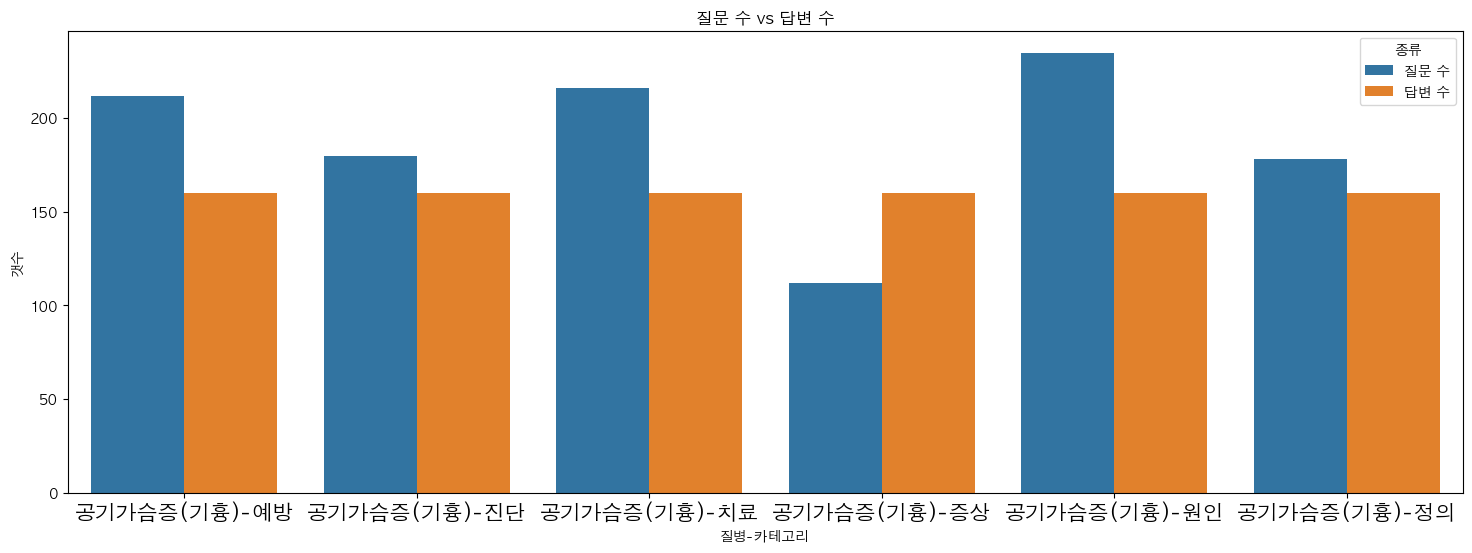

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


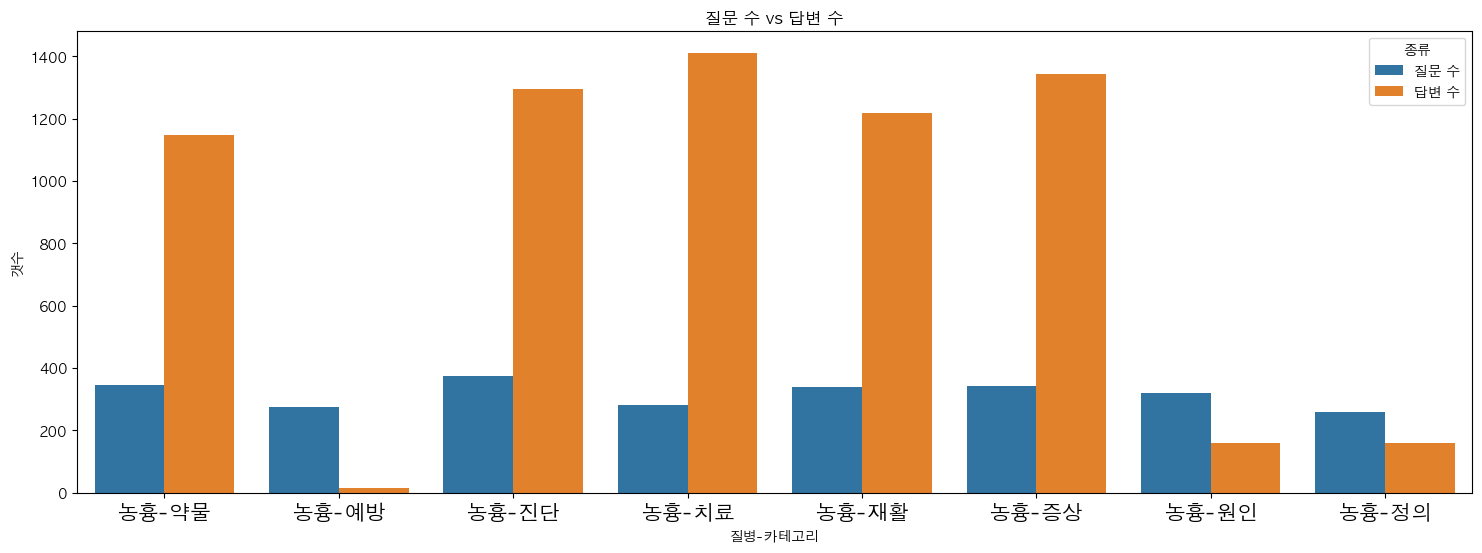

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


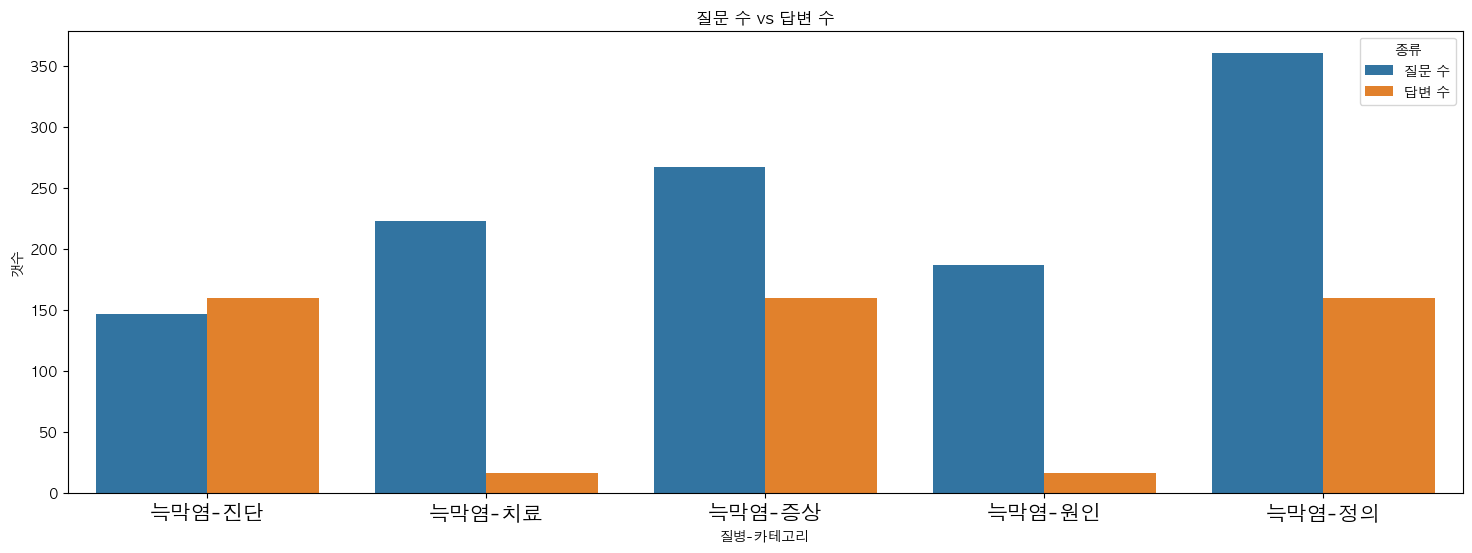

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


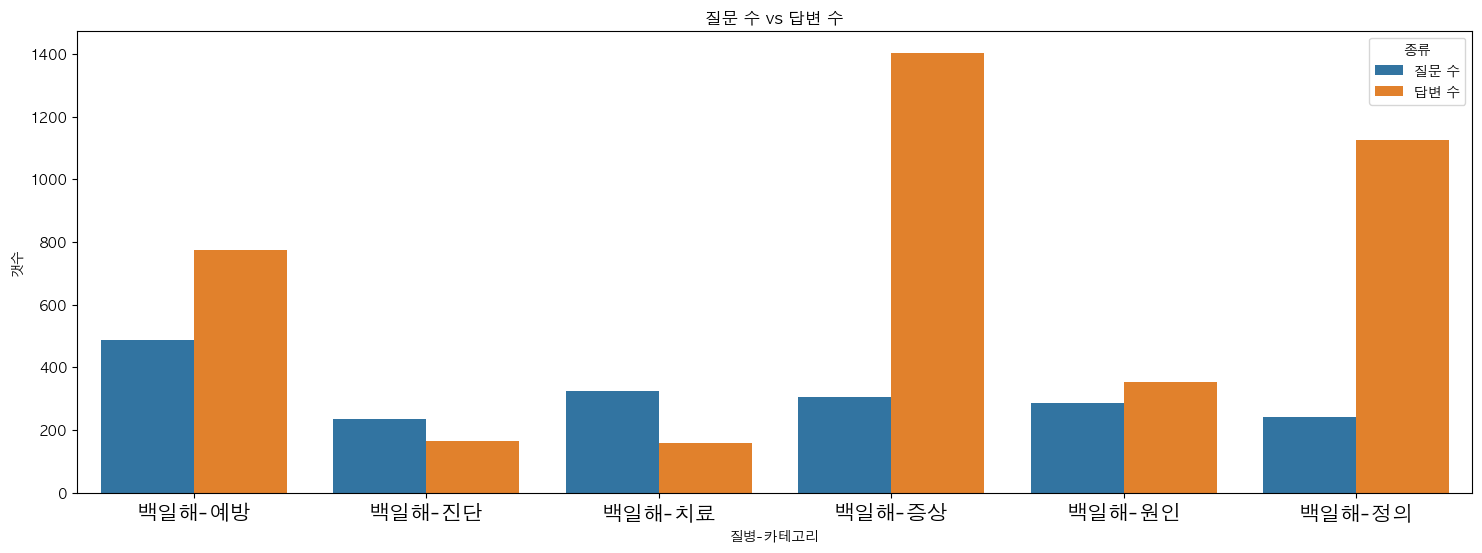

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


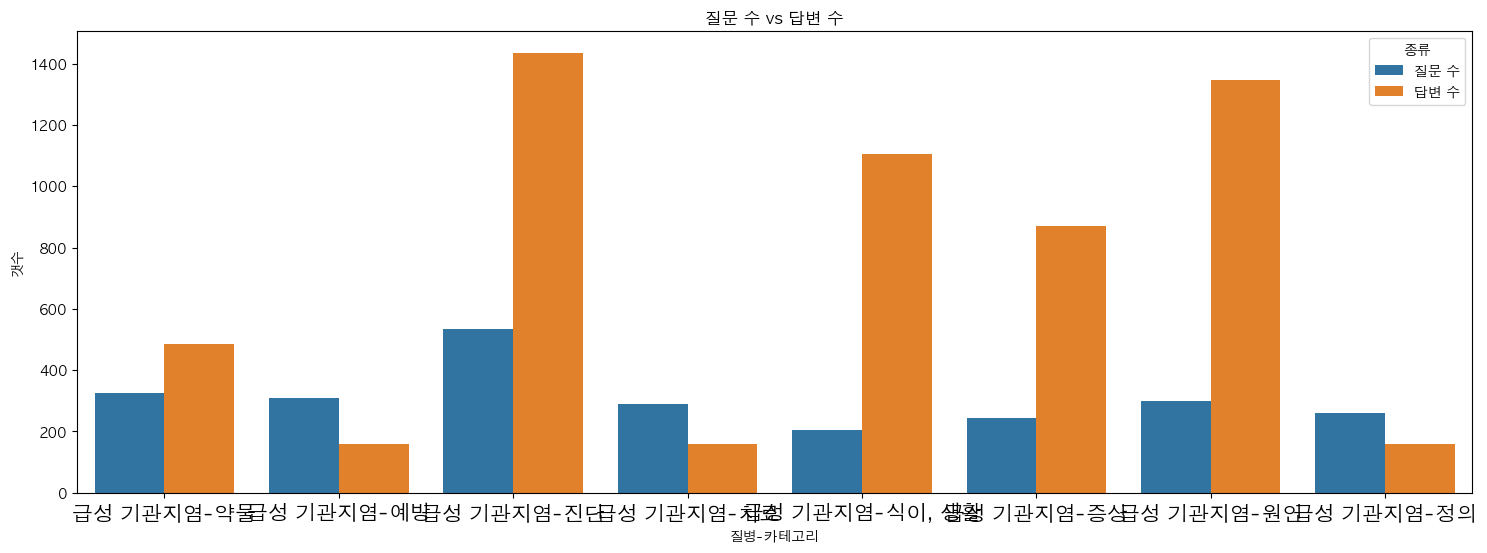

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


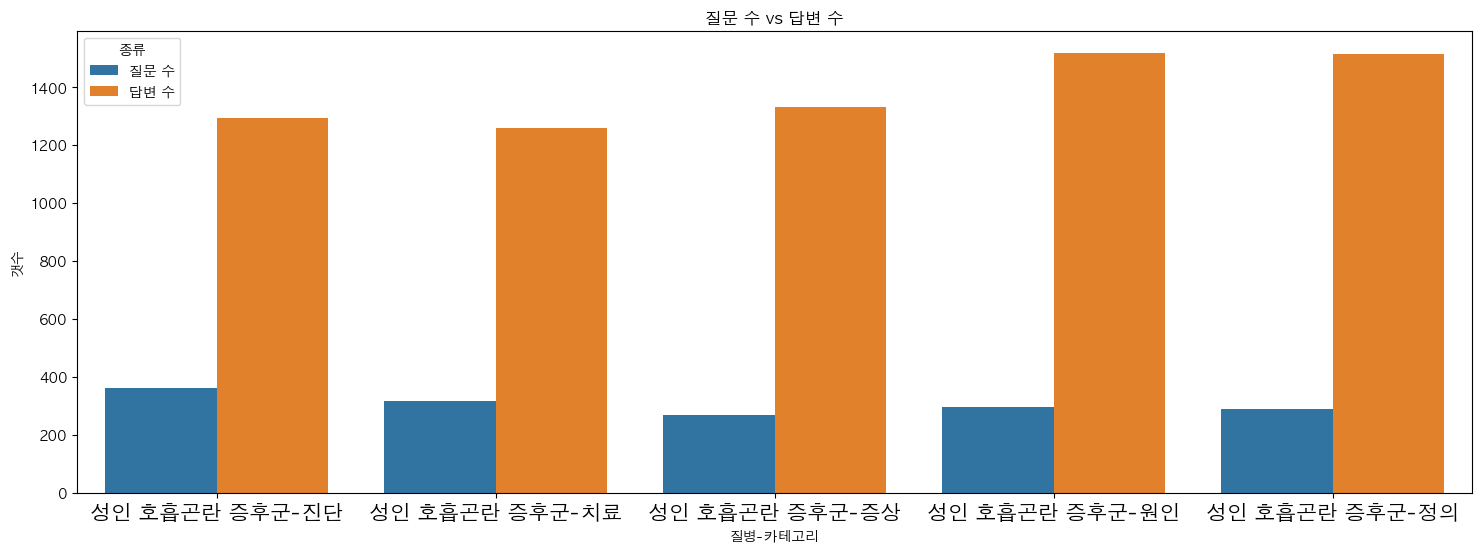

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


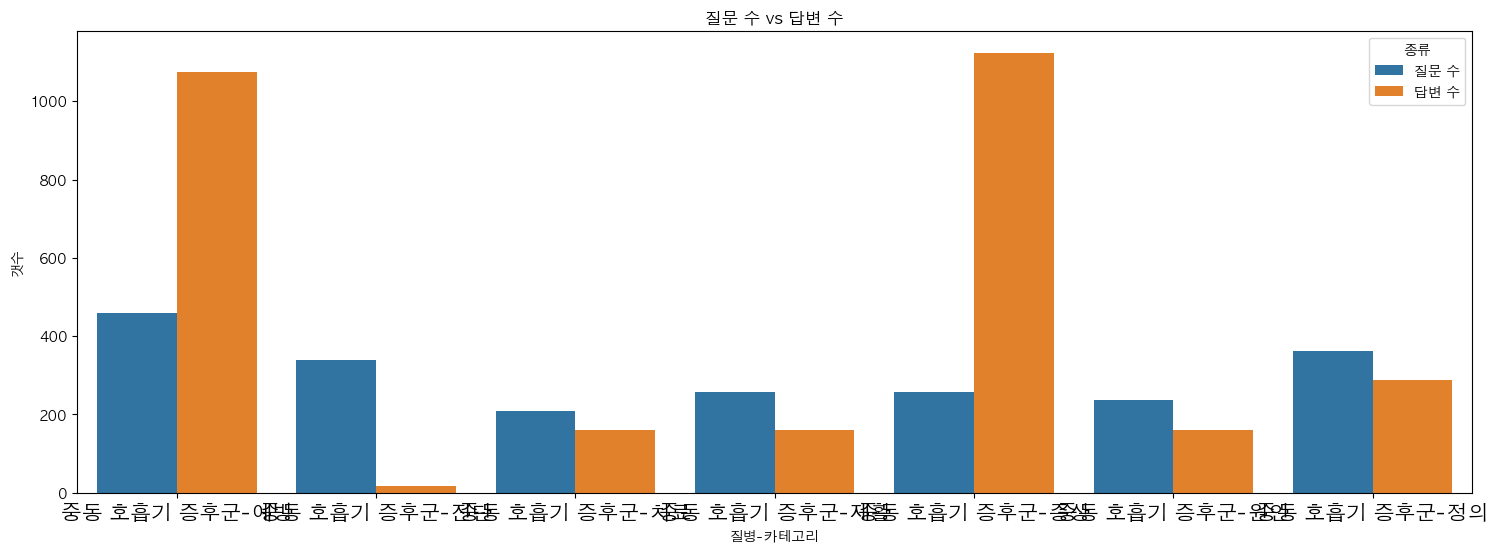

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


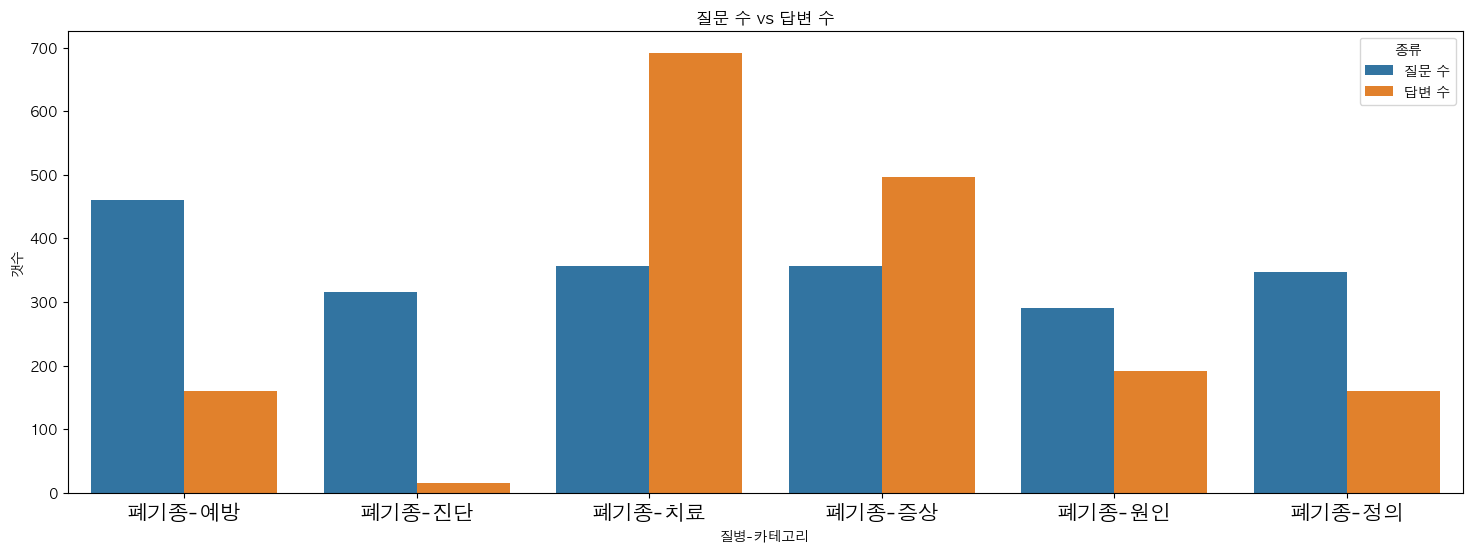

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


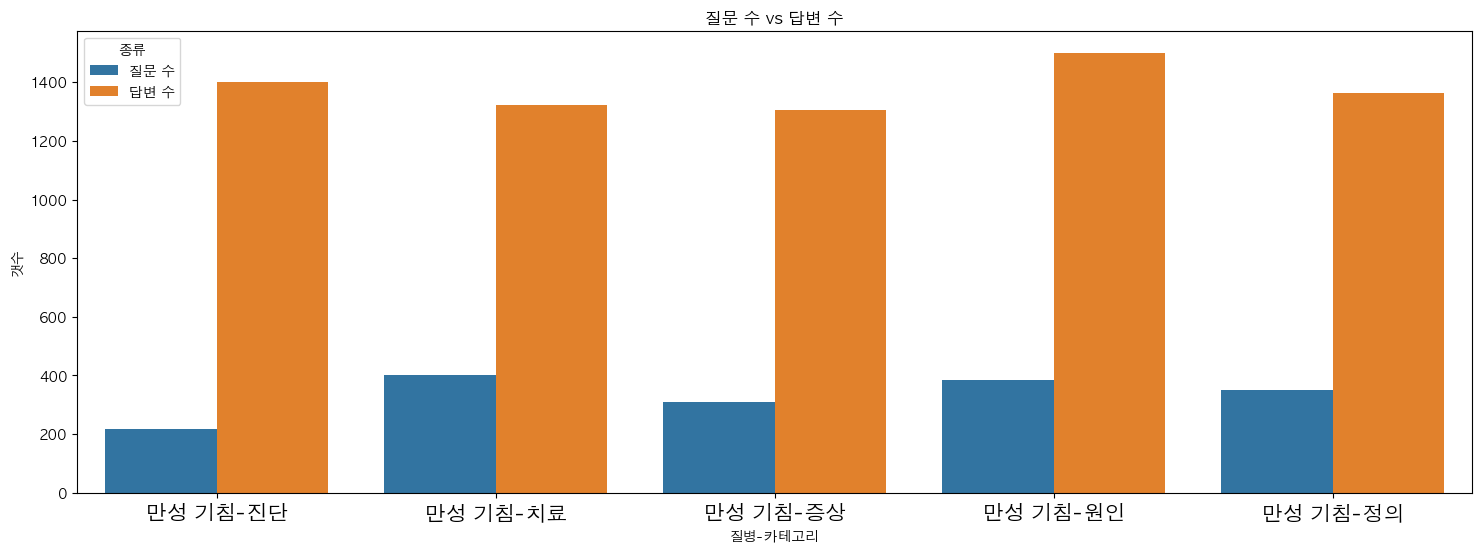

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


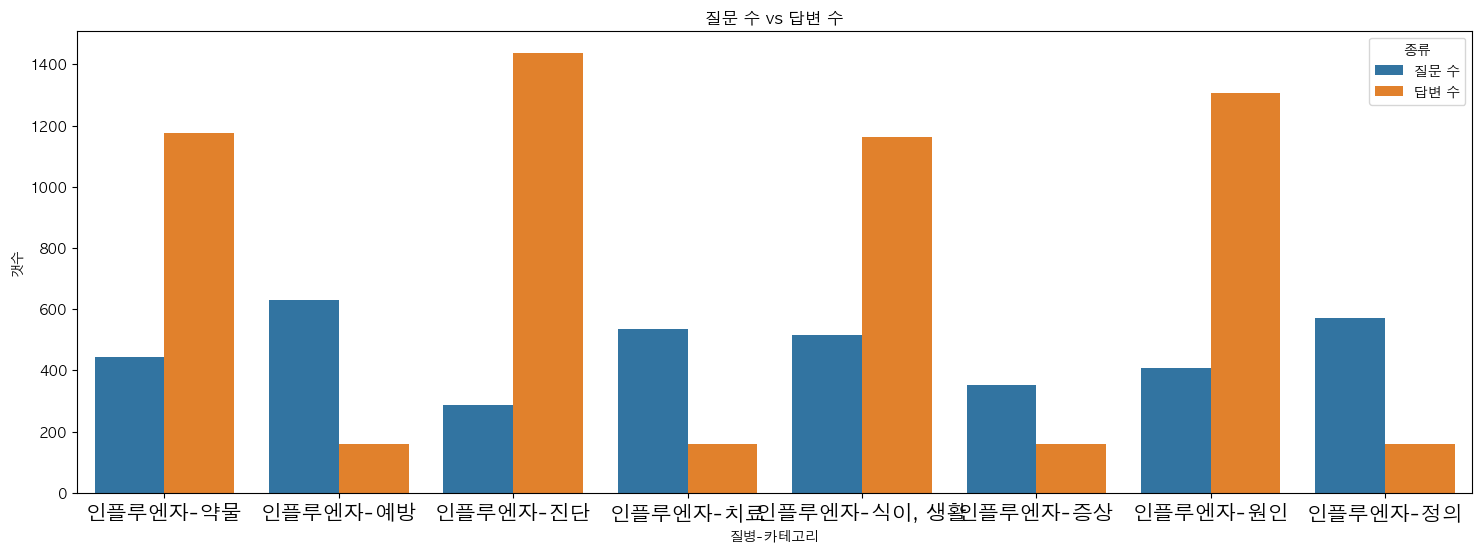

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


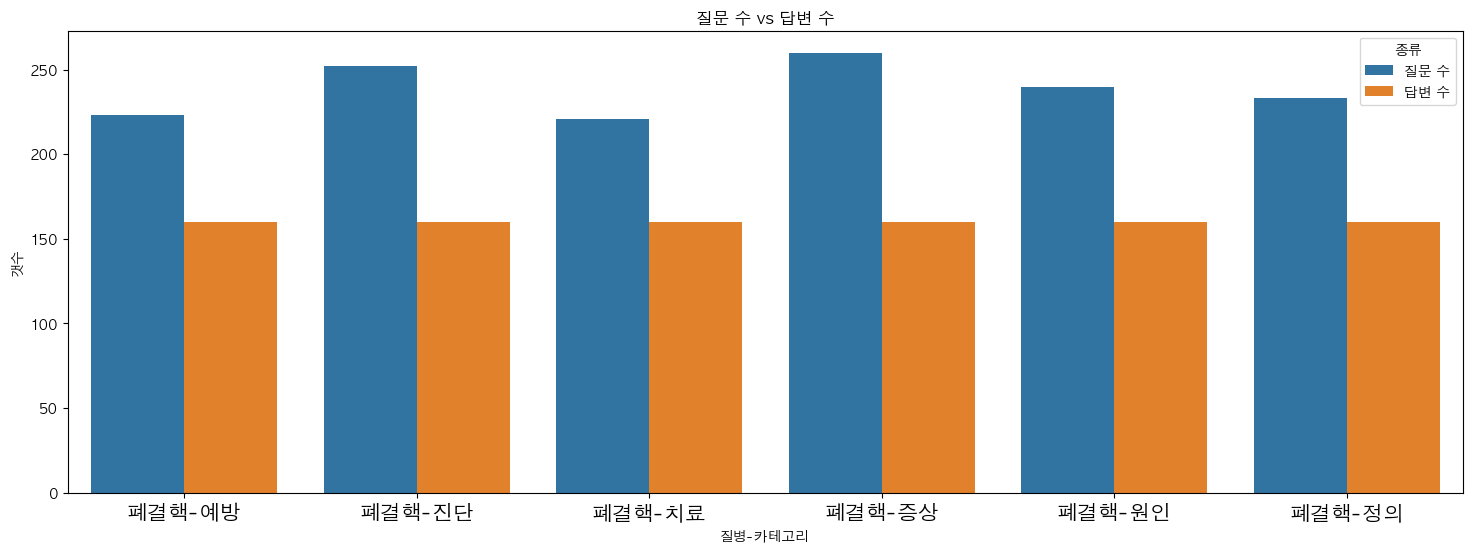

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


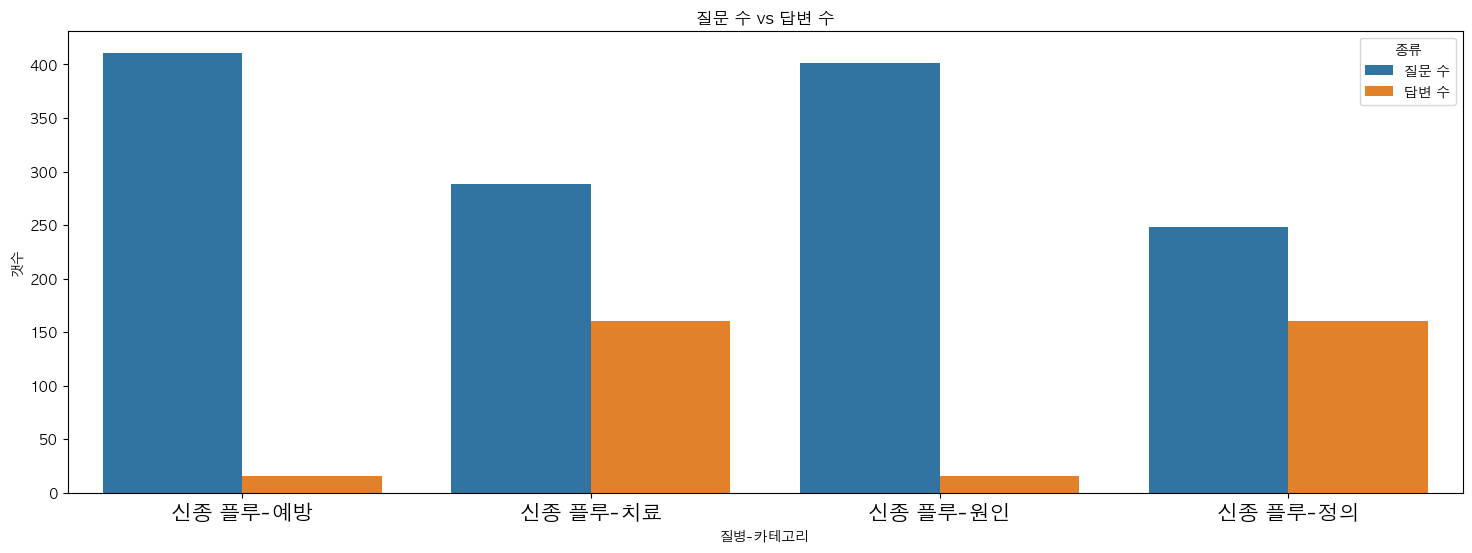

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


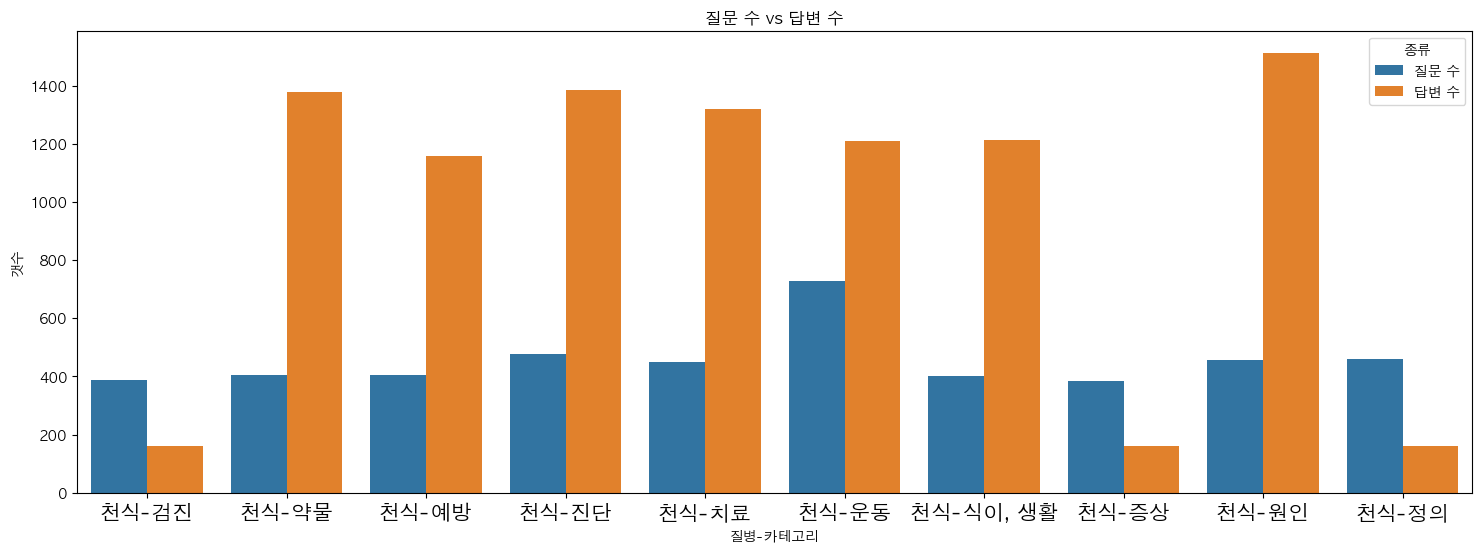

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


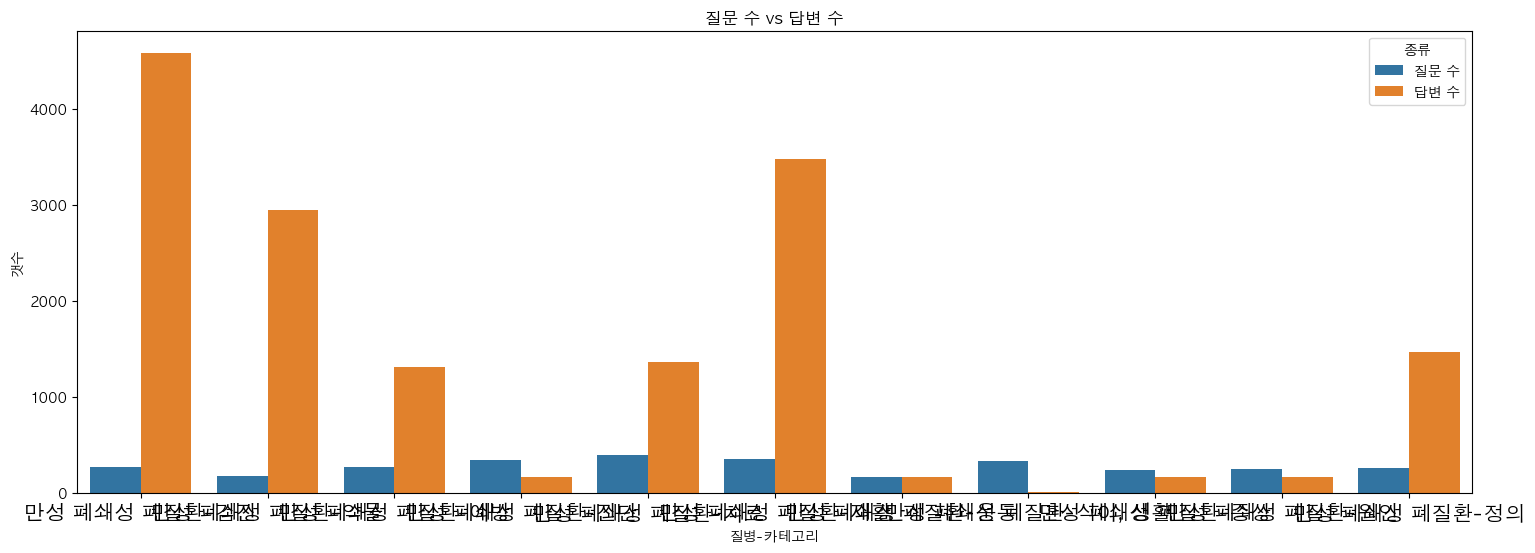

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


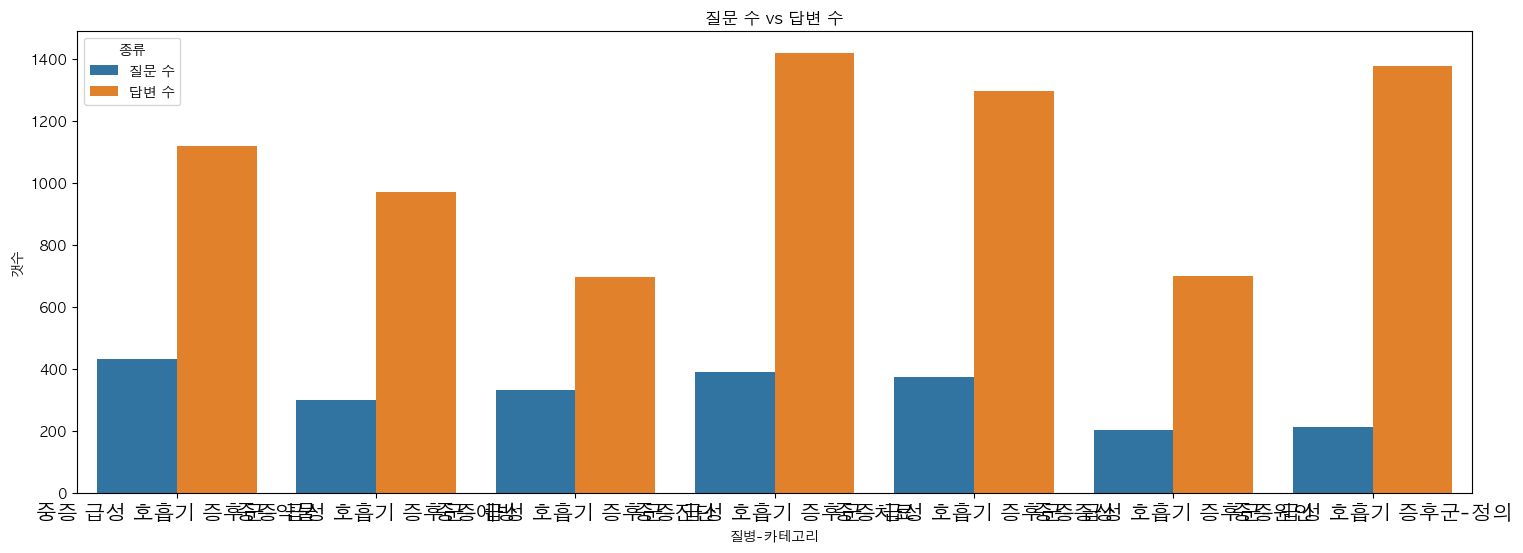

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


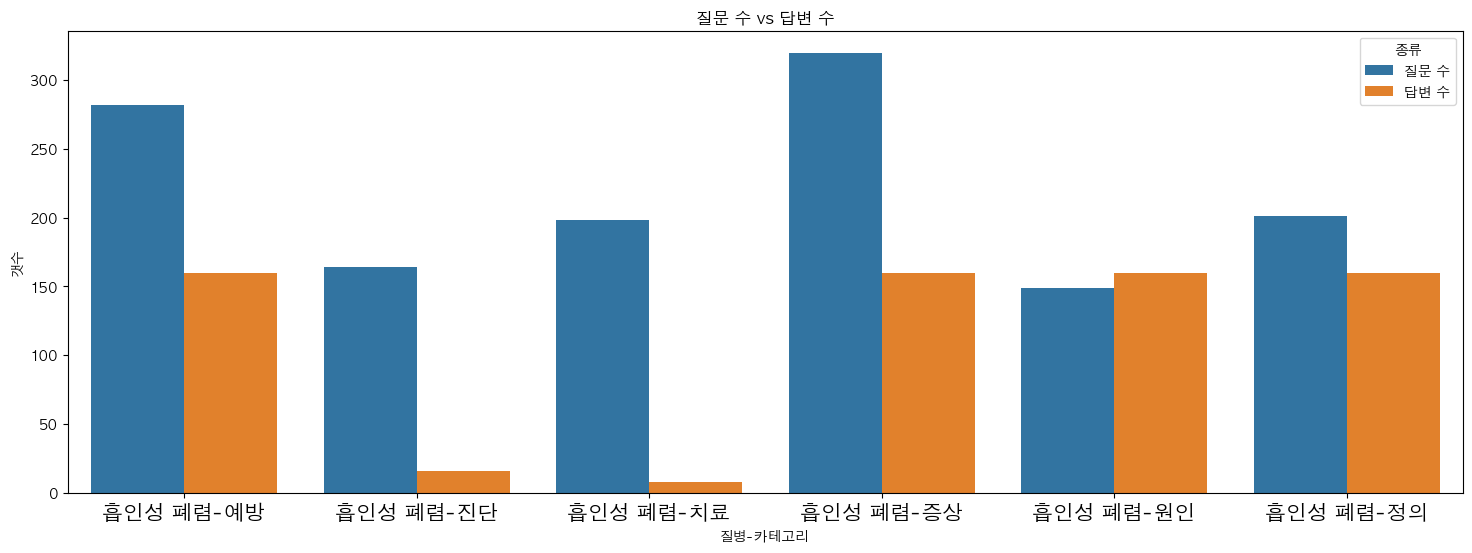

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


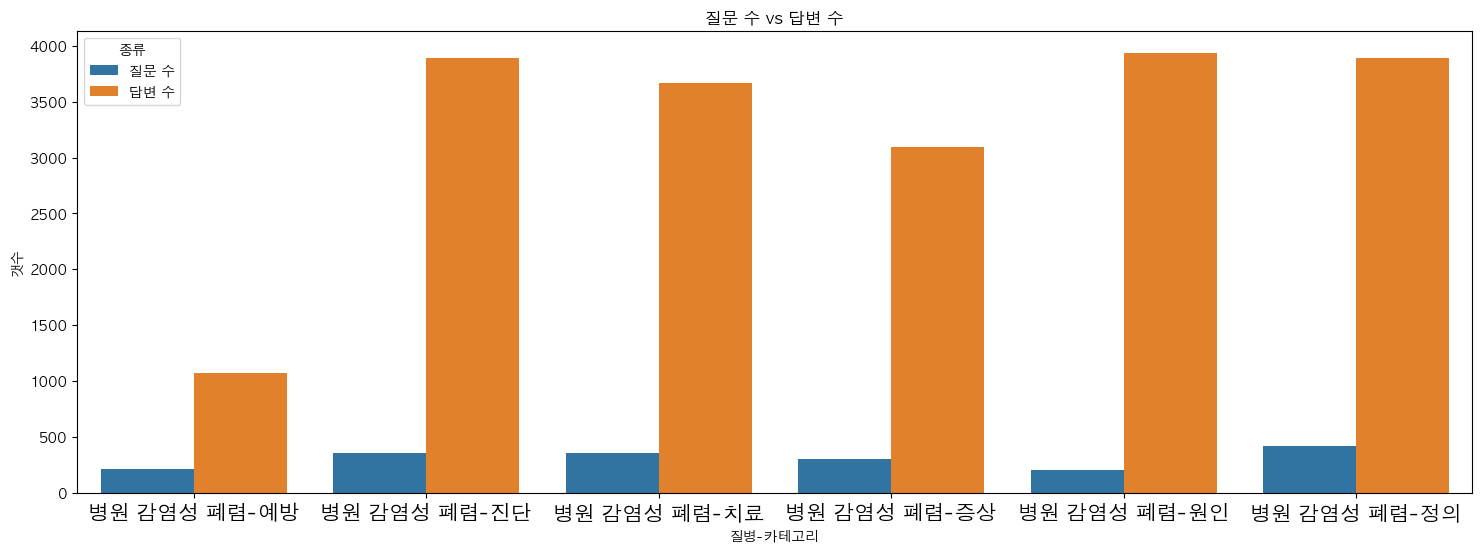

/var/folders/1t/sts9dw9x317fjpv6tzhvwldw0000gn/T/ipykernel_90960/3142187509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']


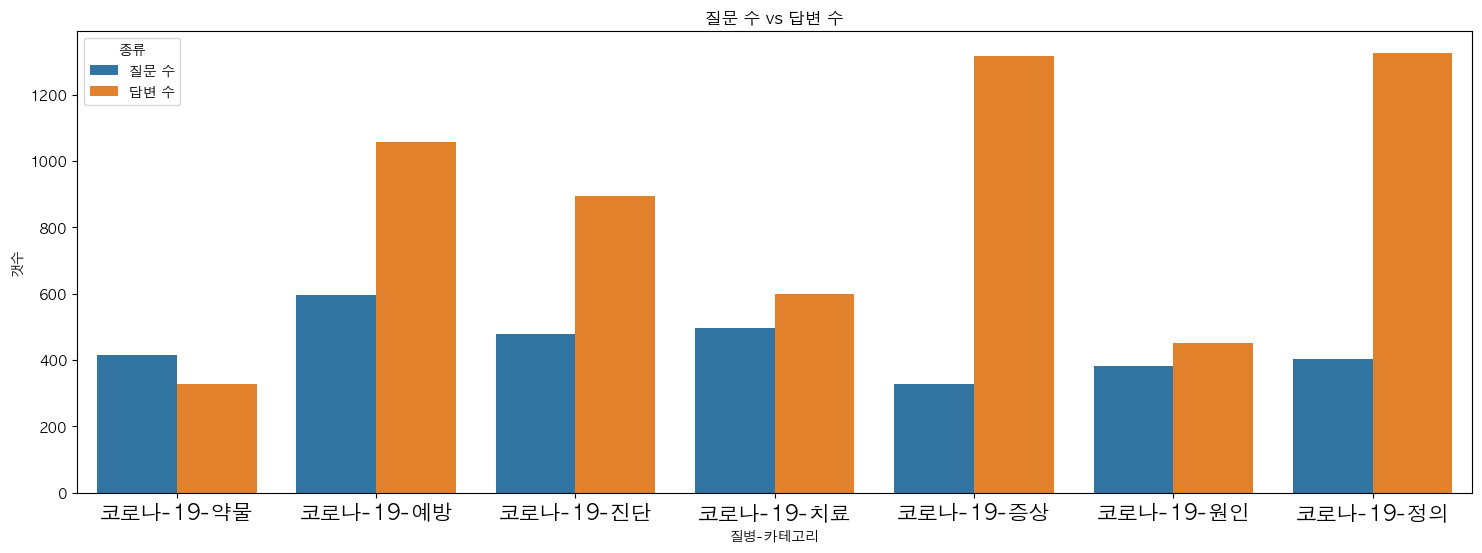

In [953]:
for disease in df_count['질병'].unique():
    df_div = df_count[df_count['질병']==disease]
    df_div['질병-카테고리'] = df_div['질병'] + '-' + df_div['카테고리']    
    df_melt = df_div.melt(
        id_vars = '질병-카테고리',
        value_vars = ['질문 수', '답변 수'],
        var_name = '종류',
        value_name ='갯수'
    )
    plt.figure(figsize=(18,6))
    sns.barplot(data=df_melt, x = '질병-카테고리', y='갯수', hue='종류')
    plt.title("질문 수 vs 답변 수")
    plt.xlabel("질병-카테고리")
    plt.ylabel("갯수")
    plt.xticks(rotation=0, fontsize=15)
    plt.legend(title='종류')
    #plt.tight_layout()
    plt.show()